# Central Research Question:

Identify trends in the performance of countries over multiple Olympic Games. Using the total awarded medals from each Olympic Games to predict how the top performing countries might perform in the future olympics.

*NOTE:* There is no information about athletes for team competitions that consist of more than 2 participants. Only team records. 

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load CSV Files

In [3]:
athletes_data = pd.read_csv('olympic_athletes.csv')
hosts_data = pd.read_csv('olympic_hosts.csv')
medals_data = pd.read_csv('olympic_medals.csv')

In [4]:
athletes_data.head(5)

athlete_url       athlete_full_name  \
0  https://olympics.com/en/athletes/cooper-woods-...  Cooper WOODS-TOPALOVIC   
1          https://olympics.com/en/athletes/elofsson          Felix ELOFSSON   
2     https://olympics.com/en/athletes/dylan-walczyk           Dylan WALCZYK   
3     https://olympics.com/en/athletes/olli-penttala           Olli PENTTALA   
4          https://olympics.com/en/athletes/reikherd        Dmitriy REIKHERD   

   games_participations        first_game  athlete_year_birth athlete_medals  \
0                     1      Beijing 2022              2000.0            NaN   
1                     2  PyeongChang 2018              1995.0            NaN   
2                     1      Beijing 2022              1993.0            NaN   
3                     1      Beijing 2022              1995.0            NaN   
4                     1      Beijing 2022              1989.0            NaN   

   bio  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [5]:
hosts_data.head(5)

game_slug         game_end_date       game_start_date  \
0      beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1        tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2  pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3          rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4        sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   

        game_location         game_name game_season  game_year  
0               China      Beijing 2022      Winter       2022  
1               Japan        Tokyo 2020      Summer       2020  
2   Republic of Korea  PyeongChang 2018      Winter       2018  
3              Brazil          Rio 2016      Summer       2016  
4  Russian Federation        Sochi 2014      Winter       2014

In [6]:
medals_data.head(5)

discipline_title     slug_game    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type participant_title  \
0         GameTeam             Italy   
1         GameTeam             Italy   
2         GameTeam            Norway   
3         GameTeam            Norway   
4         GameTeam            Sweden   

                                         athlete_url     athlete_full_name  \
0  https://olympics.com/en/athletes/stefania-cons...  Stefania CONSTANTINI   
1      https://olympics.com/en/athletes/amos-mosaner          Amos MOSANER   
2  https://olympics.com/en/athletes/kristin-skaslien      Kristin SKASLIEN   
3  https://olympics.com/en/athletes/magnus-nedreg...    Magnus NEDREGOTTEN   
4     https://olympics.com/en/athletes/almida-de-val         Almida DE VAL   

  country_name country_code country_3_letter_code  
0        Italy           IT                   ITA  
1        Italy           IT                   ITA  
2       Norway           NO                   NOR  
3       Norway           NO                   NOR  
4       Sweden           SE                   SWE

In [7]:
print(athletes_data.info(), hosts_data.info(), medals_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object

# Create a Merged Dataset

In [8]:
merge_1 = pd.merge(medals_data, hosts_data, left_on = 'slug_game', right_on = 'game_slug', how = 'inner')
merge_2 = pd.merge(athletes_data, medals_data, on = ['athlete_full_name', 'athlete_url'], how = 'inner')

merge_1.drop(['game_slug', 'game_end_date', 'game_start_date', 'country_code'], inplace = True, axis = 1)
merge_2.drop(['athlete_medals', 'bio'], inplace = True, axis = 1)

olympic_data = pd.merge(merge_1, merge_2, on = ['slug_game', 'athlete_full_name', 'discipline_title', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title', 'country_name', 'country_3_letter_code', 'athlete_url'], how = 'inner')

print(olympic_data.shape)
olympic_data.head()

(16979, 19)


discipline_title     slug_game    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type participant_title  \
0         GameTeam             Italy   
1         GameTeam             Italy   
2         GameTeam            Norway   
3         GameTeam            Norway   
4         GameTeam            Sweden   

                                         athlete_url     athlete_full_name  \
0  https://olympics.com/en/athletes/stefania-cons...  Stefania CONSTANTINI   
1      https://olympics.com/en/athletes/amos-mosaner          Amos MOSANER   
2  https://olympics.com/en/athletes/kristin-skaslien      Kristin SKASLIEN   
3  https://olympics.com/en/athletes/magnus-nedreg...    Magnus NEDREGOTTEN   
4     https://olympics.com/en/athletes/almida-de-val         Almida DE VAL   

  country_name country_3_letter_code game_location     game_name game_season  \
0        Italy                   ITA         China  Beijing 2022      Winter   
1        Italy                   ITA         China  Beijing 2022      Winter   
2       Norway                   NOR         China  Beijing 2022      Winter   
3       Norway                   NOR         China  Beijing 2022      Winter   
4       Sweden                   SWE         China  Beijing 2022      Winter   

   game_year  games_participations        first_game  athlete_year_birth  \
0       2022                     1      Beijing 2022              1999.0   
1       2022                     2  PyeongChang 2018              1995.0   
2       2022                     2  PyeongChang 2018              1986.0   
3       2022                     2  PyeongChang 2018              1990.0   
4       2022                     1      Beijing 2022              1997.0   

  country_code  
0           IT  
1           IT  
2           NO  
3           NO  
4           SE

In [9]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16979 entries, 0 to 16978
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   discipline_title       16979 non-null  object 
 1   slug_game              16979 non-null  object 
 2   event_title            16979 non-null  object 
 3   event_gender           16979 non-null  object 
 4   medal_type             16979 non-null  object 
 5   participant_type       16979 non-null  object 
 6   participant_title      2793 non-null   object 
 7   athlete_url            16979 non-null  object 
 8   athlete_full_name      16979 non-null  object 
 9   country_name           16979 non-null  object 
 10  country_3_letter_code  16979 non-null  object 
 11  game_location          16979 non-null  object 
 12  game_name              16979 non-null  object 
 13  game_season            16979 non-null  object 
 14  game_year              16979 non-null  int64  
 15  ga

In [10]:
olympic_data.isnull().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        14186
athlete_url                  0
athlete_full_name            0
country_name                 0
country_3_letter_code        0
game_location                0
game_name                    0
game_season                  0
game_year                    0
games_participations         0
first_game                   1
athlete_year_birth         183
country_code              1038
dtype: int64

# Deletion and Imputation

In [11]:
missing_data = (olympic_data.isna().sum()/len(olympic_data)).round(2)
missing_data_columns = missing_data[missing_data >= 0.2]
print(missing_data_columns)

delete_threshold = 0.2
olympic_data_no_na = olympic_data.drop(columns = missing_data[missing_data > delete_threshold].index)
olympic_data_no_na.isnull().sum()[olympic_data.isnull().sum() > 0]

participant_title    0.84
dtype: float64


first_game               1
athlete_year_birth     183
country_code          1038
dtype: int64

In [12]:
olympic_data = olympic_data_no_na.copy()
olympic_data.head(5)

discipline_title     slug_game    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type                                        athlete_url  \
0         GameTeam  https://olympics.com/en/athletes/stefania-cons...   
1         GameTeam      https://olympics.com/en/athletes/amos-mosaner   
2         GameTeam  https://olympics.com/en/athletes/kristin-skaslien   
3         GameTeam  https://olympics.com/en/athletes/magnus-nedreg...   
4         GameTeam     https://olympics.com/en/athletes/almida-de-val   

      athlete_full_name country_name country_3_letter_code game_location  \
0  Stefania CONSTANTINI        Italy                   ITA         China   
1          Amos MOSANER        Italy                   ITA         China   
2      Kristin SKASLIEN       Norway                   NOR         China   
3    Magnus NEDREGOTTEN       Norway                   NOR         China   
4         Almida DE VAL       Sweden                   SWE         China   

      game_name game_season  game_year  games_participations  \
0  Beijing 2022      Winter       2022                     1   
1  Beijing 2022      Winter       2022                     2   
2  Beijing 2022      Winter       2022                     2   
3  Beijing 2022      Winter       2022                     2   
4  Beijing 2022      Winter       2022                     1   

         first_game  athlete_year_birth country_code  
0      Beijing 2022              1999.0           IT  
1  PyeongChang 2018              1995.0           IT  
2  PyeongChang 2018              1986.0           NO  
3  PyeongChang 2018              1990.0           NO  
4      Beijing 2022              1997.0           SE

# Preprocessing

In [13]:
unique_counts = {}

for col in olympic_data:
    unique_count = olympic_data[col].nunique()
    unique_counts[col] = unique_count
    
print('Unique value counts for each column:')
for col, count in unique_counts.items():
    print(f'{col}: {count}')

Unique value counts for each column:
discipline_title: 64
slug_game: 53
event_title: 1183
event_gender: 4
medal_type: 3
participant_type: 2
athlete_url: 12086
athlete_full_name: 12071
country_name: 149
country_3_letter_code: 149
game_location: 26
game_name: 53
game_season: 2
game_year: 37
games_participations: 10
first_game: 53
athlete_year_birth: 157
country_code: 139


In [14]:
unique_values = olympic_data['discipline_title'].unique()

print('Unique values in the column:')
for value in unique_values:
    print(value)

Unique values in the column:
Curling
Freestyle Skiing
Short Track Speed Skating
Snowboard
Ski Jumping
Figure skating
Luge
Biathlon
Alpine Skiing
Skeleton
Cross Country Skiing
Speed skating
Nordic Combined
Bobsleigh
Shooting
Diving
Canoe Sprint
Cycling Road
Boxing
Artistic Swimming
Cycling BMX Racing
Triathlon
Surfing
Table Tennis
Canoe Slalom
Marathon Swimming
Trampoline Gymnastics
Taekwondo
Cycling Track
Fencing
Badminton
Sport Climbing
Wrestling
Tennis
Artistic Gymnastics
Golf
Cycling BMX Freestyle
Judo
Skateboarding
Archery
Weightlifting
Equestrian
Modern Pentathlon
Athletics
Swimming
Sailing
Cycling Mountain Bike
Rowing
Karate
Rhythmic Gymnastics
Beach Volleyball
Short Track
Cycling BMX
Gymnastics Rhythmic
Equestrian Jumping
Gymnastics Artistic
Synchronized Swimming
Trampoline
Equestrian Eventing
Equestrian Dressage
Canoe Marathon
Jeu de Paume
Rackets
Roque


In [15]:
mapping = {'Gymnastics Artistic': 'Artistic Gymnastics',
           'Gymnastics Rhythmic': 'Rhythmic Gymnastics',
           'Synchronized Swimming': 'Artistic Swimming',
           'Equestrian Dressage': 'Equestrian',
           'Equestrian Jumping': 'Equestrian',
           'Equestrian Eventing': 'Equestrian',
           'Trampoline': 'Trampoline Gymnastics',
           'Cycling BMX': 'Cycling BMX Racing',
           'Short Track Speed Skating': 'Short Track'}

olympic_data['discipline_title'] = olympic_data['discipline_title'].replace(mapping)

olympic_data['discipline_title'].nunique()

55

In [16]:
mapping = {'United States of America': 'USA', 
           "People's Republic of China": 'China',
           'Republic of Korea': 'South Korea', 
           'Islamic Republic of Iran': 'Iran', 
           'Chinese Taipei': 'Taiwan', 
           'Olympic Athletes from Russia': 'Russia', 
           'German Democratic Republic (Germany)': 'Germany', 
           'Federal Republic of Germany': 'Germany', 
           "Democratic People's Republic of Korea": 'North Korea',
           'ROC': 'Russia'}

olympic_data['country_name'] = olympic_data['country_name'].replace(mapping)

olympic_data['country_name'].nunique()

146

In [17]:
unique_values = olympic_data['country_name'].unique()

print('Unique values in the column:')
for value in unique_values:
    print(value)

Unique values in the column:
Italy
Norway
Sweden
Canada
Japan
New Zealand
USA
Russia
Switzerland
China
France
Australia
Germany
Ukraine
Belarus
Estonia
Netherlands
Hungary
South Korea
Belgium
Spain
Slovenia
Austria
Czech Republic
Poland
Slovakia
Finland
San Marino
Serbia
Cuba
Great Britain
Bulgaria
Iran
Kuwait
Denmark
Mexico
Republic of Moldova
Brazil
Portugal
Ecuador
Ireland
Philippines
Kazakhstan
Uzbekistan
Azerbaijan
Ghana
Thailand
Turkey
India
Taiwan
Armenia
Colombia
Bermuda
South Africa
Egypt
Jordan
Croatia
North Macedonia
Côte d'Ivoire
Tunisia
Israel
Malaysia
Hong Kong, China
Romania
Indonesia
Mongolia
Kyrgyzstan
Nigeria
Georgia
Greece
Venezuela
Kosovo
Dominican Republic
Syrian Arab Republic
Turkmenistan
Qatar
Latvia
Lithuania
Kenya
Burkina Faso
Uganda
Ethiopia
Jamaica
Puerto Rico
Bahrain
Morocco
Namibia
Grenada
Bahamas
Saudi Arabia
Liechtenstein
Russian Federation
Vietnam
North Korea
Independent Olympic Athletes
Tajikistan
Algeria
Trinidad and Tobago
Burundi
Argentina
United Ara

In [18]:
mapping = {'United States': 'USA', 
           'Australia, Sweden': 'Australia', 
           'USSR': 'Russia', 
           'Russian Federation': 'Russia'}

olympic_data['game_location'] = olympic_data['game_location'].replace(mapping)

In [19]:
unique_values = olympic_data['game_location'].unique()

print('Unique values in the column:')
for value in unique_values:
    print(value)

Unique values in the column:
China
Japan
Republic of Korea
Brazil
Russia
Great Britain
Canada
Italy
Greece
USA
Australia
Norway
Spain
France
Yugoslavia
Austria
Federal Republic of Germany
Mexico
Finland
Switzerland
Germany
Netherlands
Belgium
Sweden


# Visualization and Graphs

Looking at the disciplines that were played throughout the Olympic years.

In [25]:
filtered_data = olympic_data[olympic_data['game_season'] == 'Summer'].reset_index(drop = True)
filtered_data['game_year']

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
13887    1896
13888    1896
13889    1896
13890    1896
13891    1896
Name: game_year, Length: 13892, dtype: int64

In [28]:
def olympic_season(season):
    filtered_data = olympic_data[olympic_data['game_season'] == season].reset_index(drop = True)
    
    sort_data = filtered_data.groupby(['discipline_title', 'game_year'])['participant_type'].count().reset_index()
    heatmap = sort_data.pivot('discipline_title', 'game_year', 'participant_type')
    
    heatmap[heatmap > 0] = 1
    final_col = heatmap.columns[-1]
    
    disciplines_playing = heatmap[heatmap[final_col] == 1].sort_values(final_col)
    disciplines_not = heatmap[heatmap[final_col] != 1].sort_values(final_col)
    heatmap = pd.concat([disciplines_playing, disciplines_not])
    
    return heatmap

def plot_heatmap(data, title, size):
    data_sorted = data.sort_index()
    
    plt.figure(figsize = size)
    ax = sns.heatmap(data_sorted, annot = False, cbar = False, 
                     linewidths = 1, linecolor = 'black', 
                     square = True, cmap = 'summer')
    
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none') 
    
    ax.tick_params(axis = 'x', labelsize = 12)
    ax.tick_params(axis = 'y', labelsize = 16)
    
    ax.spines[['bottom', 'right']].set_visible(True)
    ax.set_title(f'{title} Games \n', size = 22)
    
    plt.tight_layout()
    plt.show()

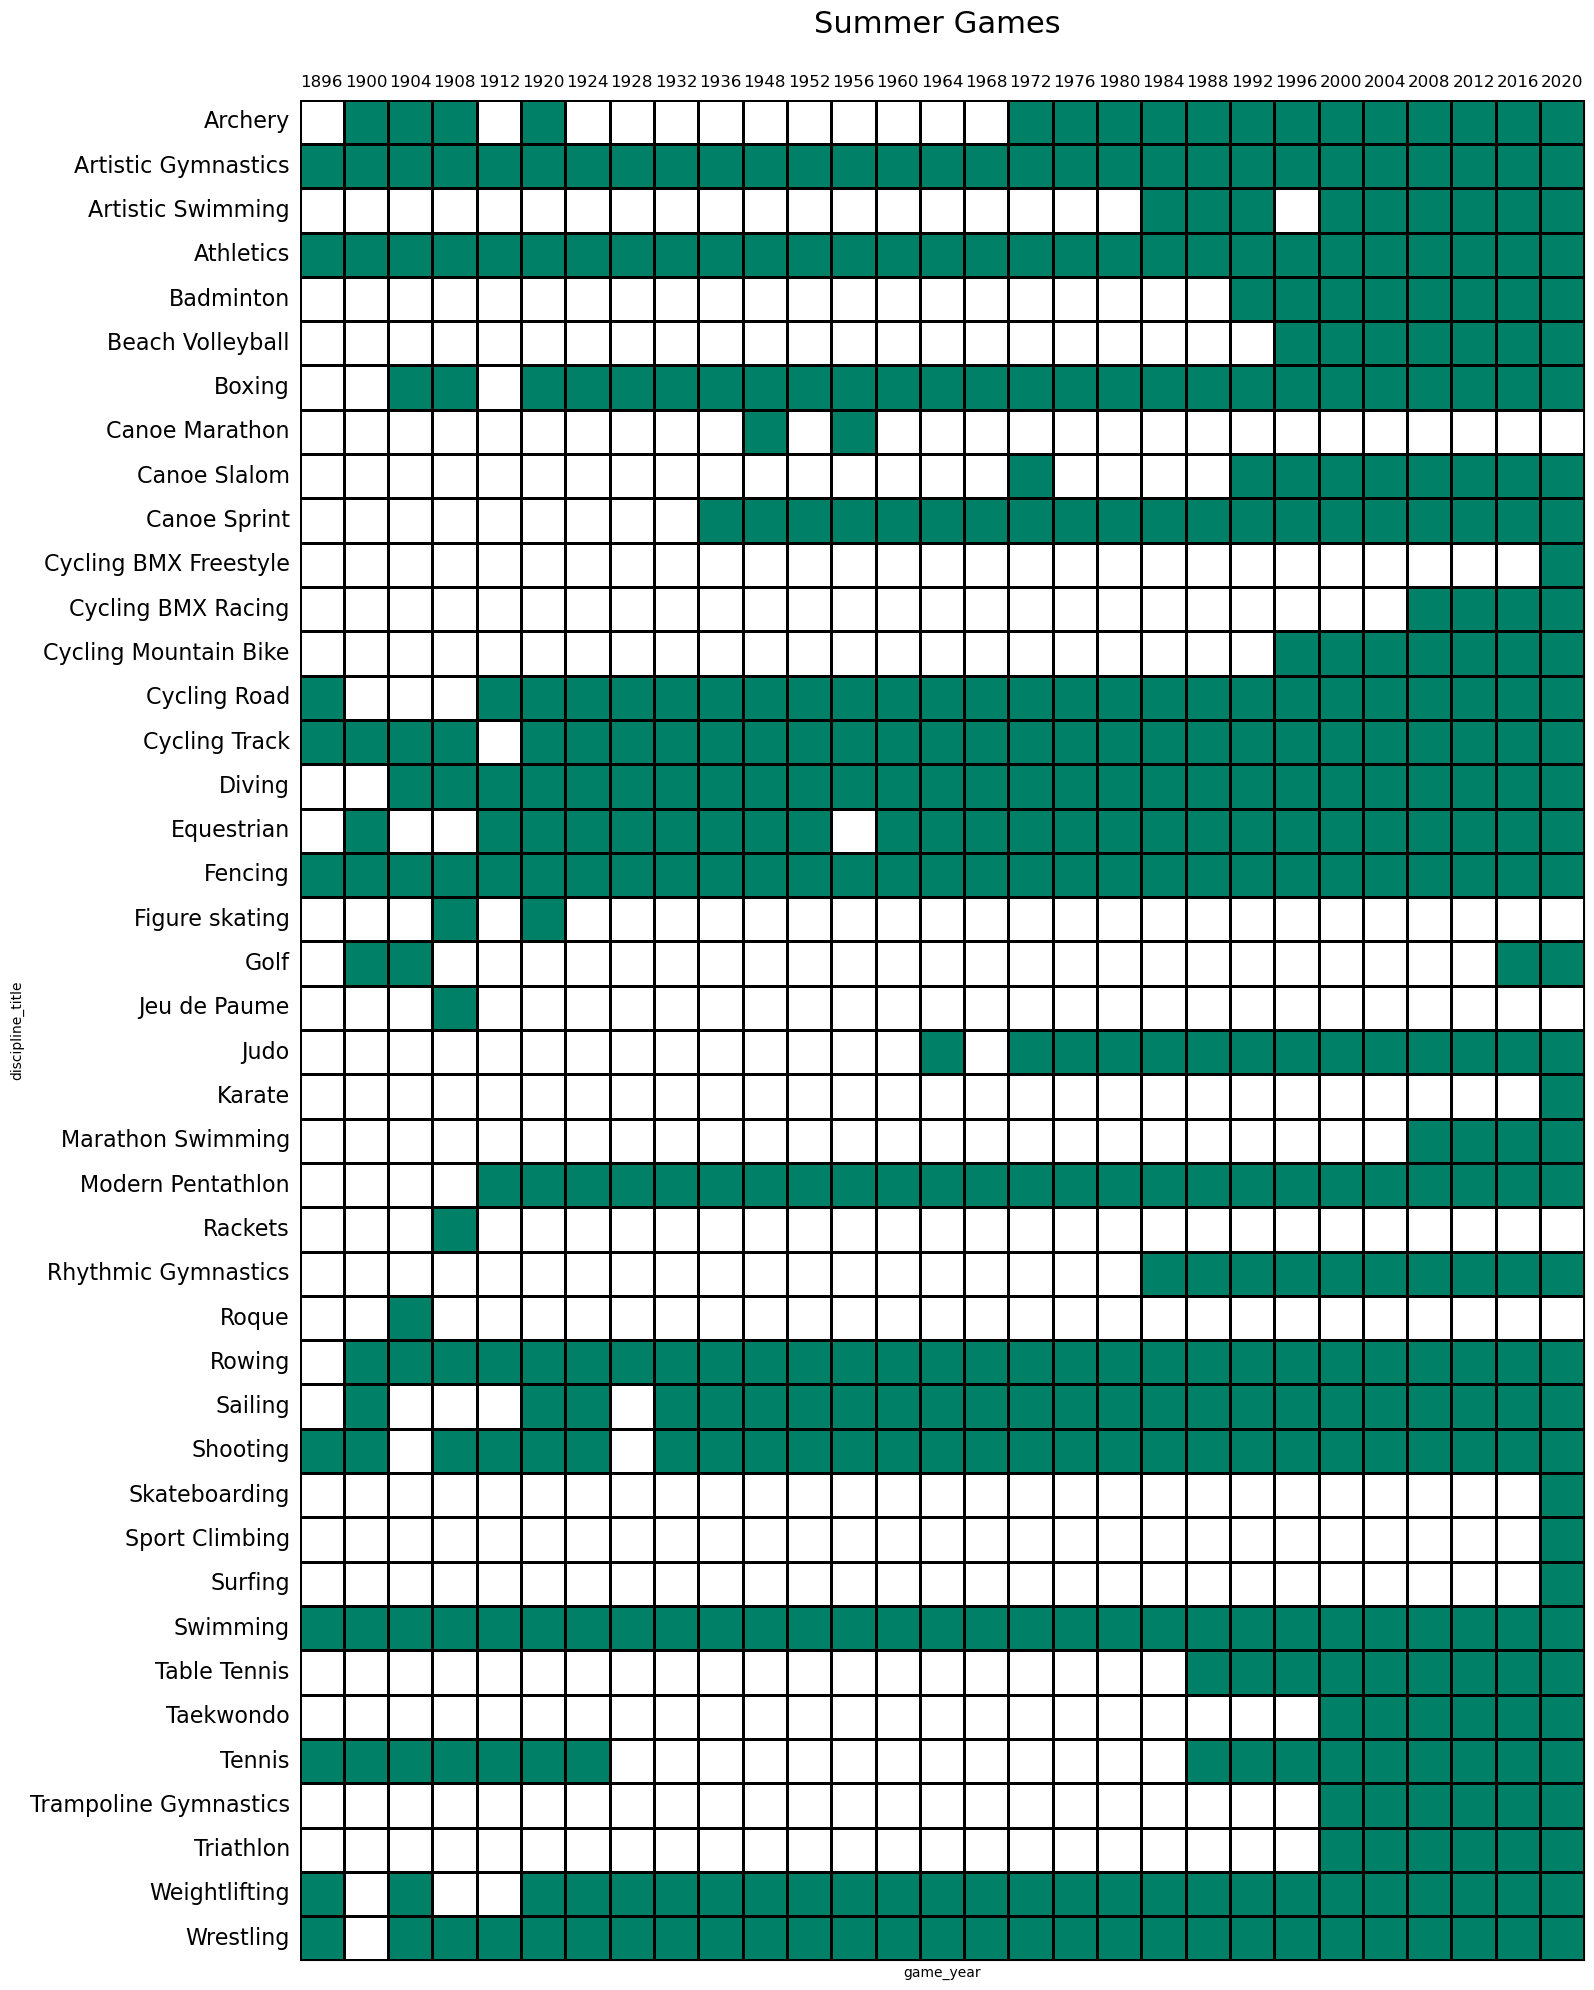

In [38]:
plot_heatmap(olympic_season('Summer'), title = 'Summer', size = (22, 20))

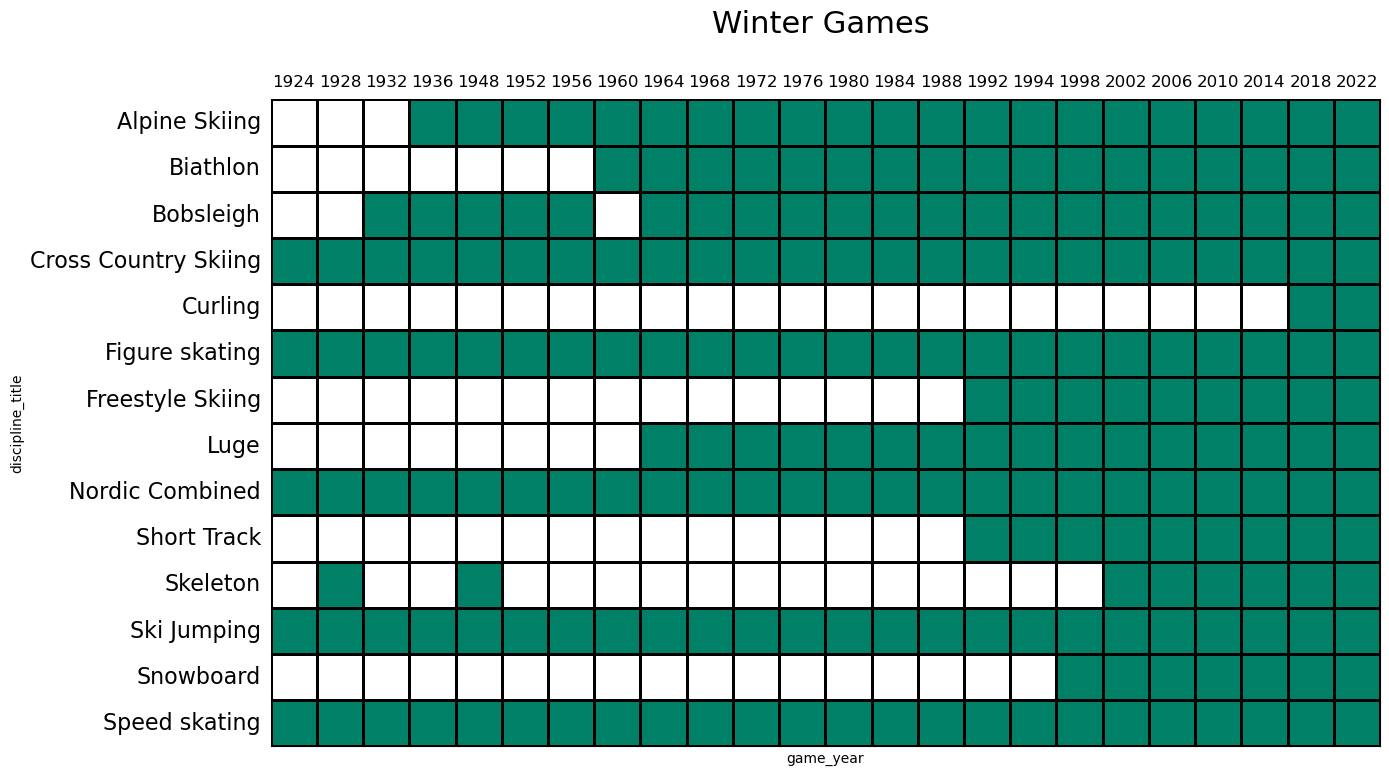

In [43]:
plot_heatmap(olympic_season('Winter'), title = 'Winter', size = (14, 20))

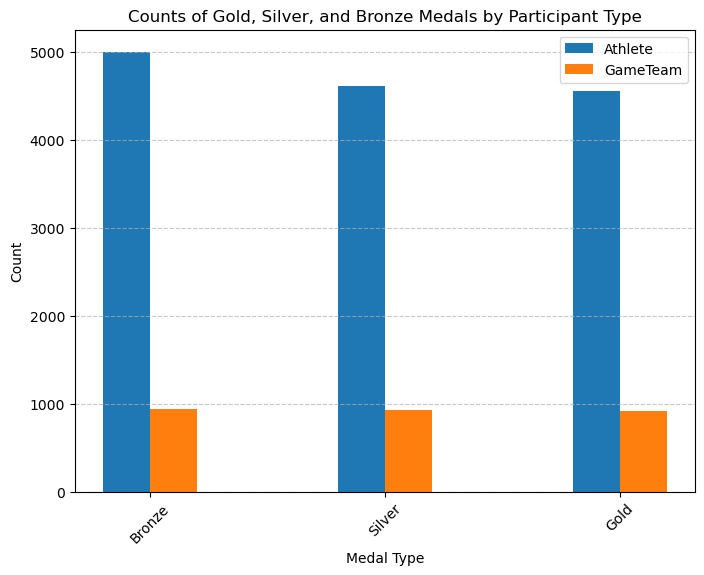

In [44]:
grouped_data = olympic_data.groupby(['medal_type', 'participant_type']).size().unstack(fill_value=0)

participant_types = grouped_data.columns
medal_types = grouped_data.index

medal_types = ['Bronze', 'Silver', 'Gold']

bar_width = 0.2

x = np.arange(len(medal_types))

fig, ax = plt.subplots(figsize = (8, 6))
for i, participant_type in enumerate(participant_types):
    ax.bar(x - bar_width/2 + i*bar_width, grouped_data[participant_type], bar_width, label = participant_type)

ax.set_xlabel('Medal Type')
ax.set_ylabel('Count')
ax.set_title('Counts of Gold, Silver, and Bronze Medals by Participant Type')
ax.set_xticks(x)
ax.set_xticklabels(medal_types)
ax.legend()

plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [89]:
other_count

1358

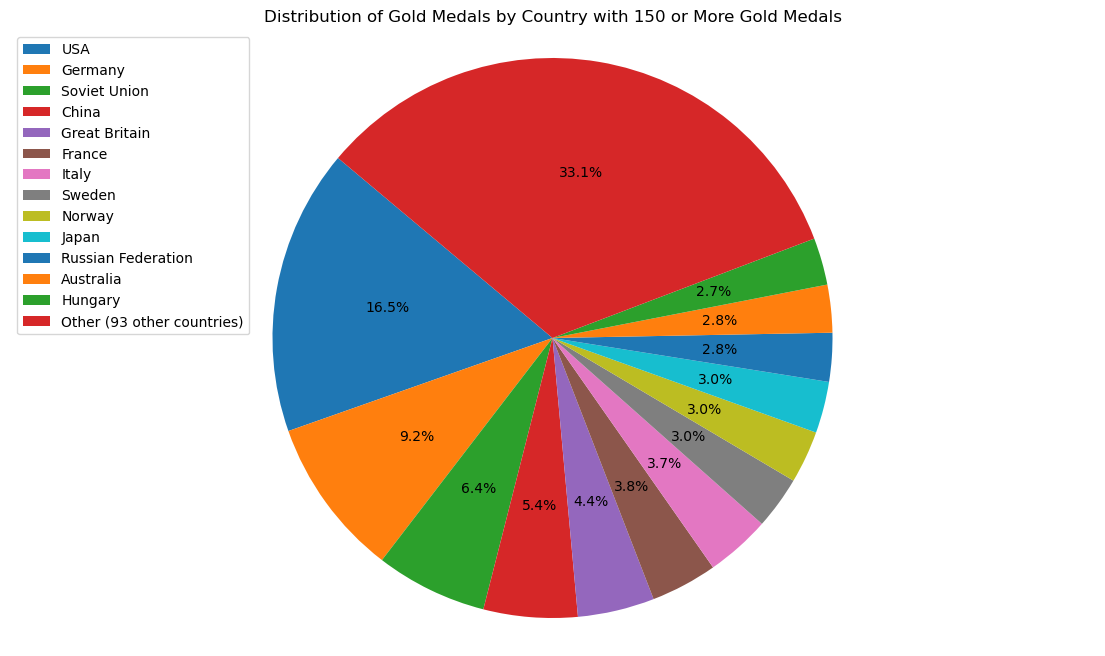

In [92]:
gold_counts = olympic_data[olympic_data['medal_type'] == 'GOLD']['country_name'].value_counts()

other_count = gold_counts[gold_counts < 150].sum()
gold_counts_top = gold_counts[gold_counts >= 150]
gold_counts_top['Other'] = other_count

plt.figure(figsize = (14, 8))
patches, texts, _ = plt.pie(gold_counts_top, autopct = '%1.1f%%', startangle = 140)

for text in texts:
    text.set_fontsize(10)
    
labels = gold_counts_top.index.tolist()
other_countries_count = len(gold_counts) - len(gold_counts_top) + 1
labels[-1] += f' ({other_countries_count} other countries)'
plt.legend(labels = labels, loc = 'upper left')

plt.title('Distribution of Gold Medals by Country with 150 or More Gold Medals')
plt.axis('equal') 
plt.show()

In [24]:
def country_medals(*medals):
    results = pd.DataFrame({'Country': olympic_data['country_name'].unique()})
    
    results.set_index('Country', inplace = True)
    
    for medal in medals:
        filtered_data = olympic_data[olympic_data['medal_type'] == medal]
        
        event_counts = filtered_data.groupby('country_name')['event_title'].count()
        event_counts.name = f'# of {medal}'
        
        results = results.join(event_counts, how = 'left')
        
    results = results.fillna(0)
    results = results.round().astype(int)
    results['Total_Medals'] = results[[f'# of {medal}' for medal in medals]].sum(axis = 1)
    
    results = results.sort_values(by = 'Total_Medals', ascending = False)

    return results

In [25]:
country_medals('GOLD', 'SILVER', 'BRONZE').head(10)

# of GOLD  # of SILVER  # of BRONZE  Total_Medals
Country                                                         
USA                  916          820          706          2442
Germany              510          535          529          1574
Soviet Union         358          284          267           909
Great Britain        246          257          260           763
China                301          219          188           708
France               213          223          267           703
Italy                207          176          227           610
Sweden               169          181          190           540
Japan                165          152          185           502
Australia            153          143          177           473

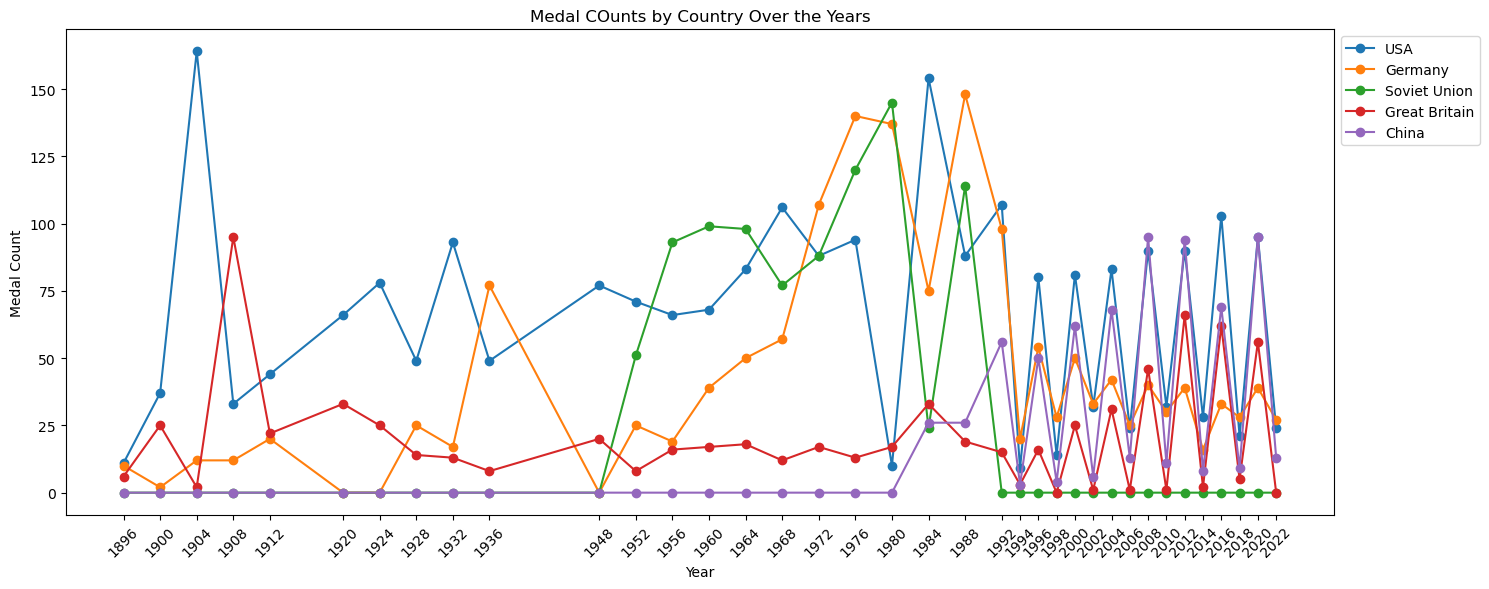

In [26]:
countries = ['USA', 'Germany', 'Soviet Union', 'Great Britain', 'China']

data_line = olympic_data.groupby(['game_year', 'country_name']).size().unstack(fill_value = 0)

years = sorted(olympic_data['game_year'].unique())
data_line = data_line.reindex(years, fill_value = 0)

plt.figure(figsize = (15, 6))

for country in countries:
    plt.plot(list(data_line.index), data_line[country], label = country, marker = 'o')
    
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Medal COunts by Country Over the Years')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xticks(data_line.index, rotation = 45)

plt.tight_layout()
plt.show()

Looking at the timeline before the separation of the Summer and Winter Olympics seasons.

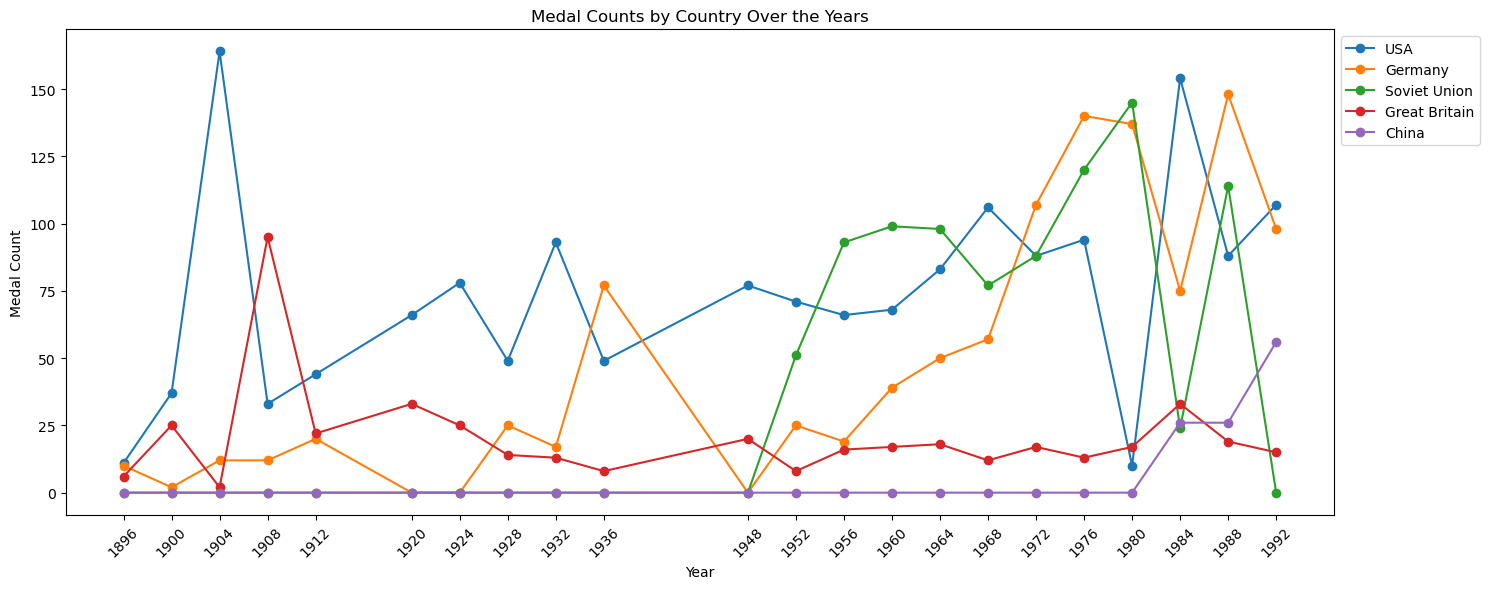

In [27]:
countries = ['USA', 'Germany', 'Soviet Union', 'Great Britain', 'China']

filtered_data = olympic_data[olympic_data['game_year'] < 1994]
data_line = filtered_data.groupby(['game_year', 'country_name']).size().unstack(fill_value = 0)

years = sorted(filtered_data['game_year'].unique())
data_line = data_line.reindex(years, fill_value = 0)

plt.figure(figsize = (15, 6))

for country in countries:
    plt.plot(list(data_line.index), data_line[country], label = country, marker = 'o')
    
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Medal Counts by Country Over the Years')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xticks(data_line.index, rotation = 45)

plt.tight_layout()
plt.show()

Looking into the individual performance of countries for the medal types won and the seasons.

In [28]:
def plot_trends(country, medal, season):
    year_counts = pd.DataFrame(columns = ('index', 'game_year'))
    year_counts['index'] = olympic_data['game_year'].unique()
    year_counts['game_year'] = 0
    year_counts = year_counts.sort_values(by = 'index')
    
    if (medal == 'ALL') and (season == 'Both Seasons'):
        filtered_data = olympic_data[(olympic_data['country_name'] == country)]
    elif (medal == 'ALL') | (season == 'Both Seasons'):
        filtered_data = olympic_data[(olympic_data['country_name'] == country) & 
                                     ((olympic_data['game_season'] == season) | 
                                      (olympic_data['medal_type'] == medal))]
    else:
        filtered_data = olympic_data[(olympic_data['country_name'] == country) & 
                                     (olympic_data['game_season'] == season) & 
                                     (olympic_data['medal_type'] == medal)]
    
    plt.figure(figsize = (15, 5))
    
    medal_counts = filtered_data['game_year'].value_counts().reset_index()
    
    for index, row in medal_counts.iterrows():
        year_counts.loc[year_counts['index'] == row['index'], 'game_year'] = row['game_year']  
        
    year_counts = year_counts.set_index('index')['game_year'].squeeze()
    medal_counts_list = year_counts.values.tolist()
    
    sns.barplot(x = year_counts.index, y = year_counts.values, color = 'skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Medals')
    plt.title(f'Number of {medal} Medals Won by {country} during {season}')
    
    plt.xticks(rotation = 90)
    
    plt.tight_layout()
    plt.show()
    
    print(medal_counts_list)

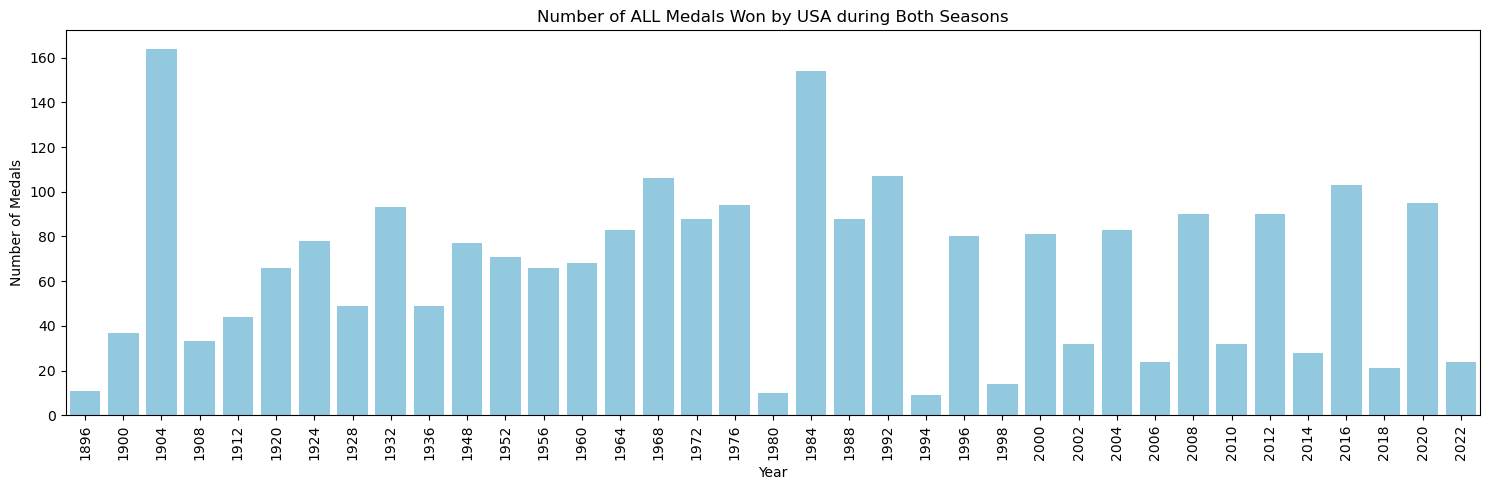

[11, 37, 164, 33, 44, 66, 78, 49, 93, 49, 77, 71, 66, 68, 83, 106, 88, 94, 10, 154, 88, 107, 9, 80, 14, 81, 32, 83, 24, 90, 32, 90, 28, 103, 21, 95, 24]


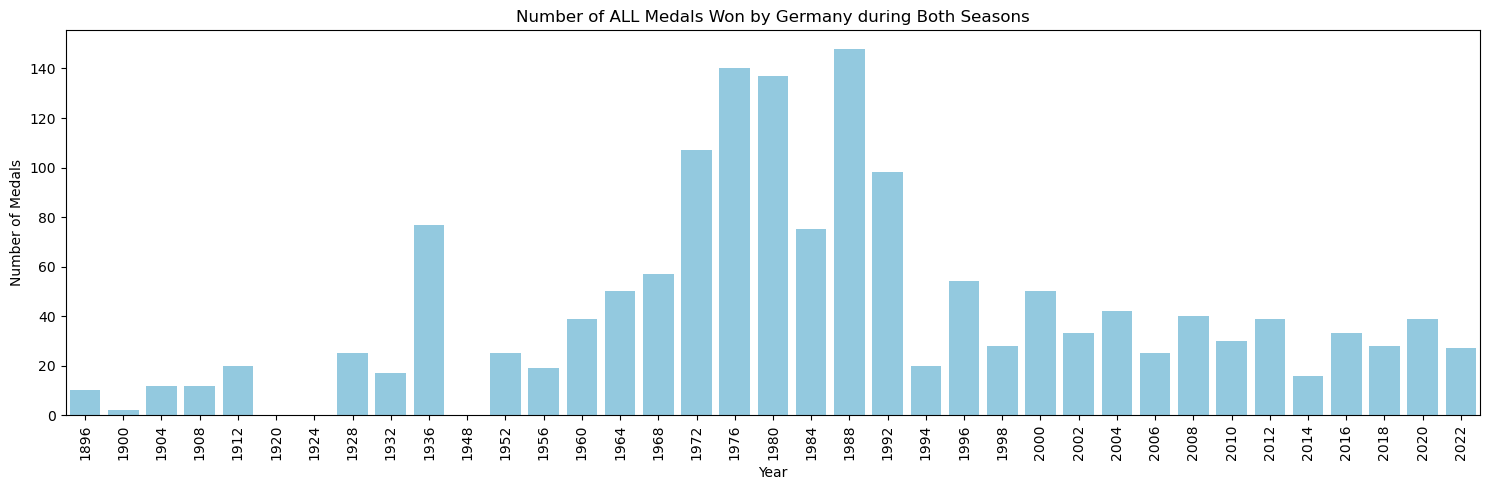

[10, 2, 12, 12, 20, 0, 0, 25, 17, 77, 0, 25, 19, 39, 50, 57, 107, 140, 137, 75, 148, 98, 20, 54, 28, 50, 33, 42, 25, 40, 30, 39, 16, 33, 28, 39, 27]


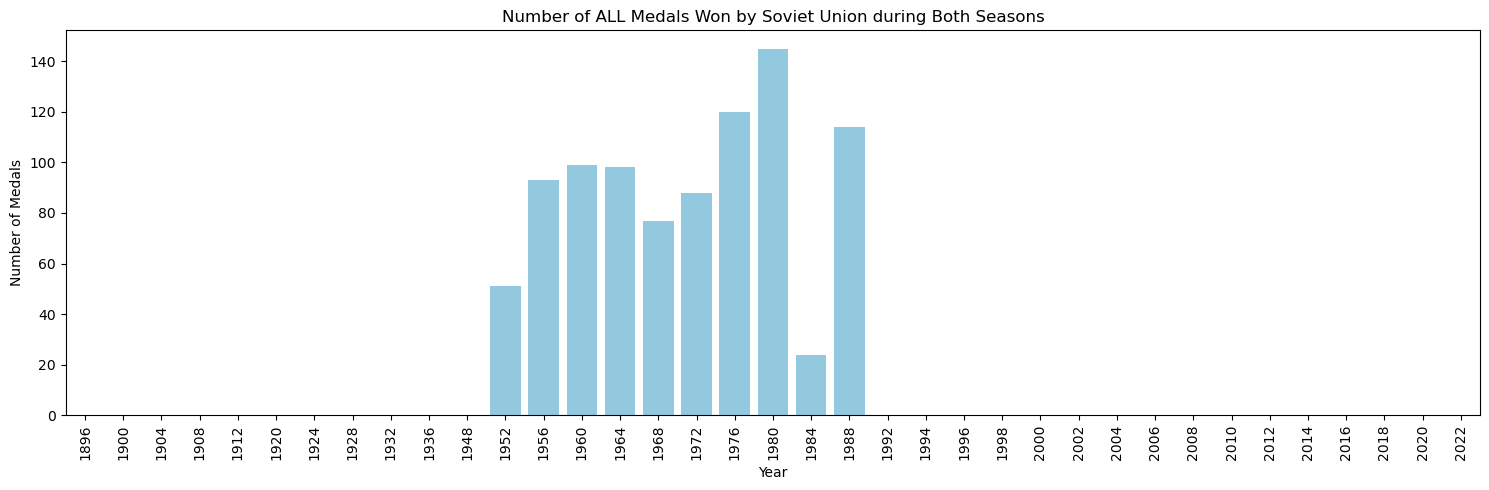

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 93, 99, 98, 77, 88, 120, 145, 24, 114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


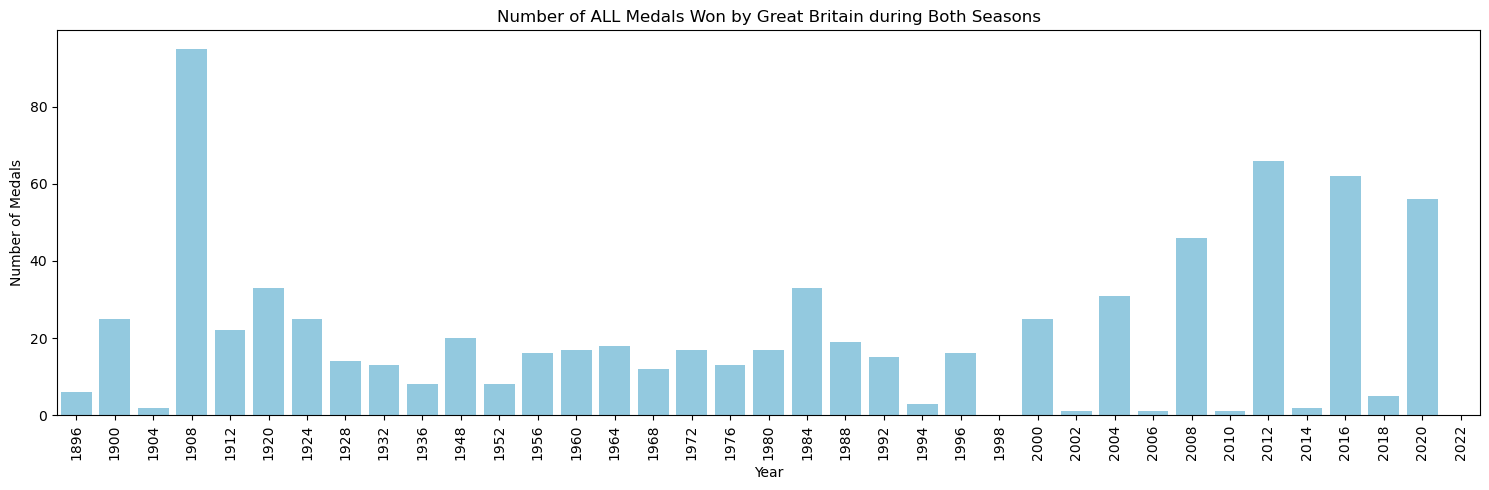

[6, 25, 2, 95, 22, 33, 25, 14, 13, 8, 20, 8, 16, 17, 18, 12, 17, 13, 17, 33, 19, 15, 3, 16, 0, 25, 1, 31, 1, 46, 1, 66, 2, 62, 5, 56, 0]


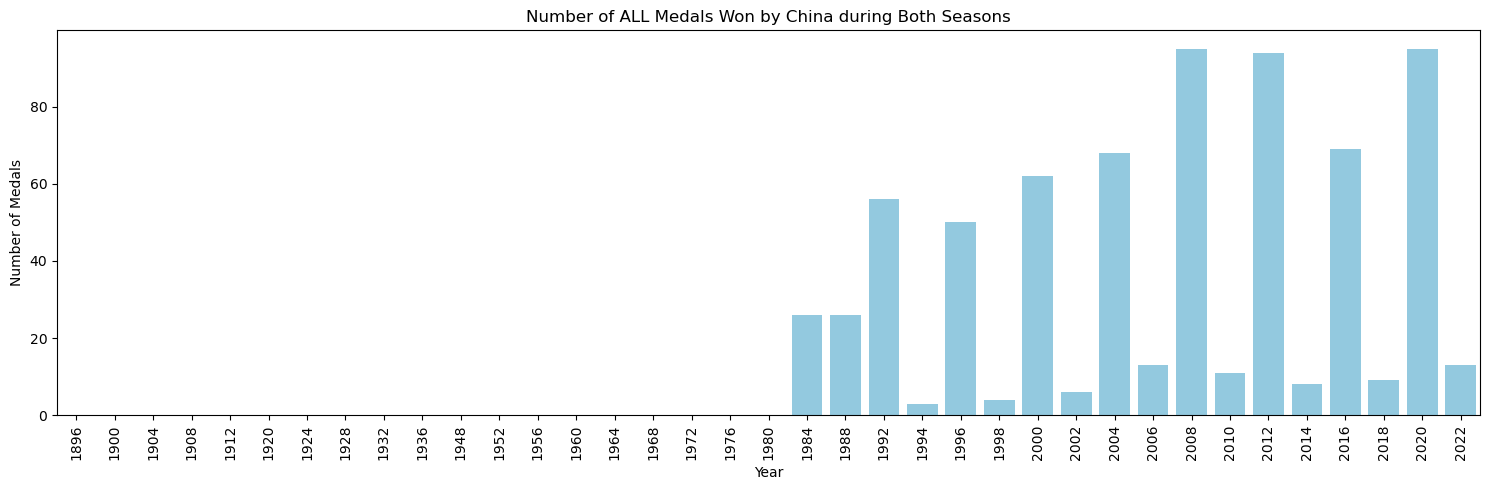

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 56, 3, 50, 4, 62, 6, 68, 13, 95, 11, 94, 8, 69, 9, 95, 13]


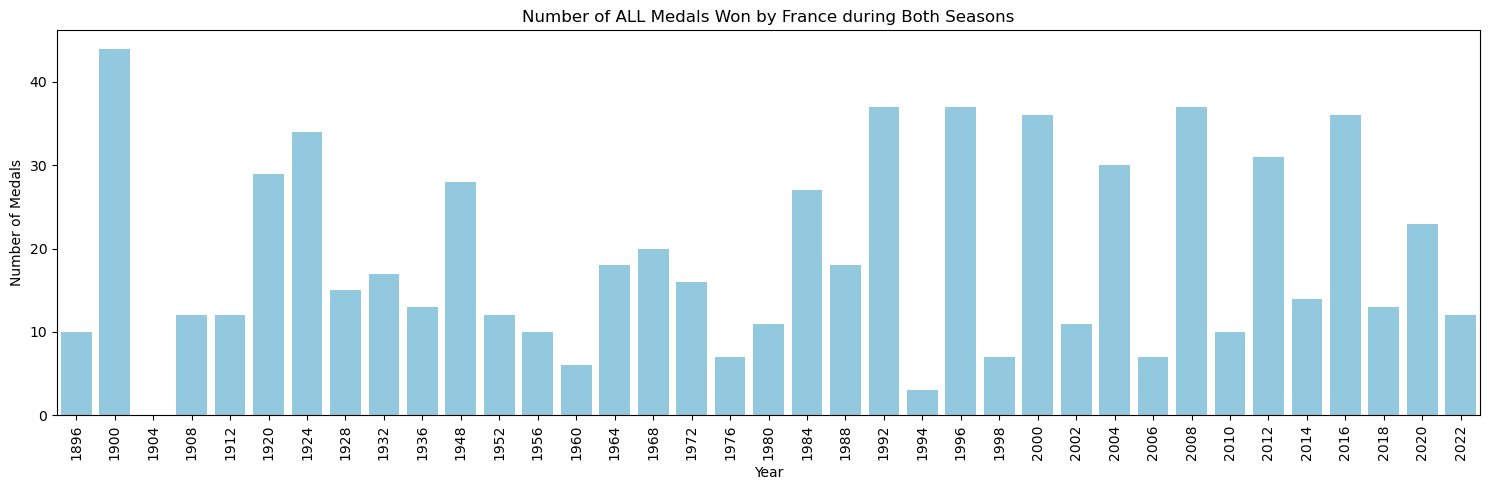

[10, 44, 0, 12, 12, 29, 34, 15, 17, 13, 28, 12, 10, 6, 18, 20, 16, 7, 11, 27, 18, 37, 3, 37, 7, 36, 11, 30, 7, 37, 10, 31, 14, 36, 13, 23, 12]


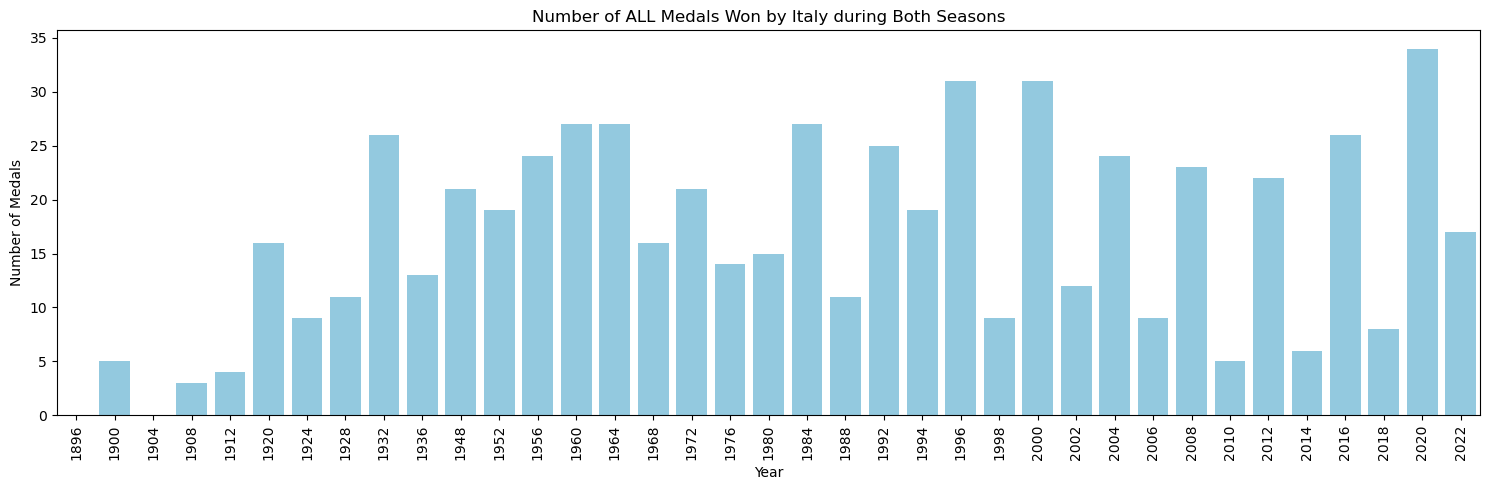

[0, 5, 0, 3, 4, 16, 9, 11, 26, 13, 21, 19, 24, 27, 27, 16, 21, 14, 15, 27, 11, 25, 19, 31, 9, 31, 12, 24, 9, 23, 5, 22, 6, 26, 8, 34, 17]


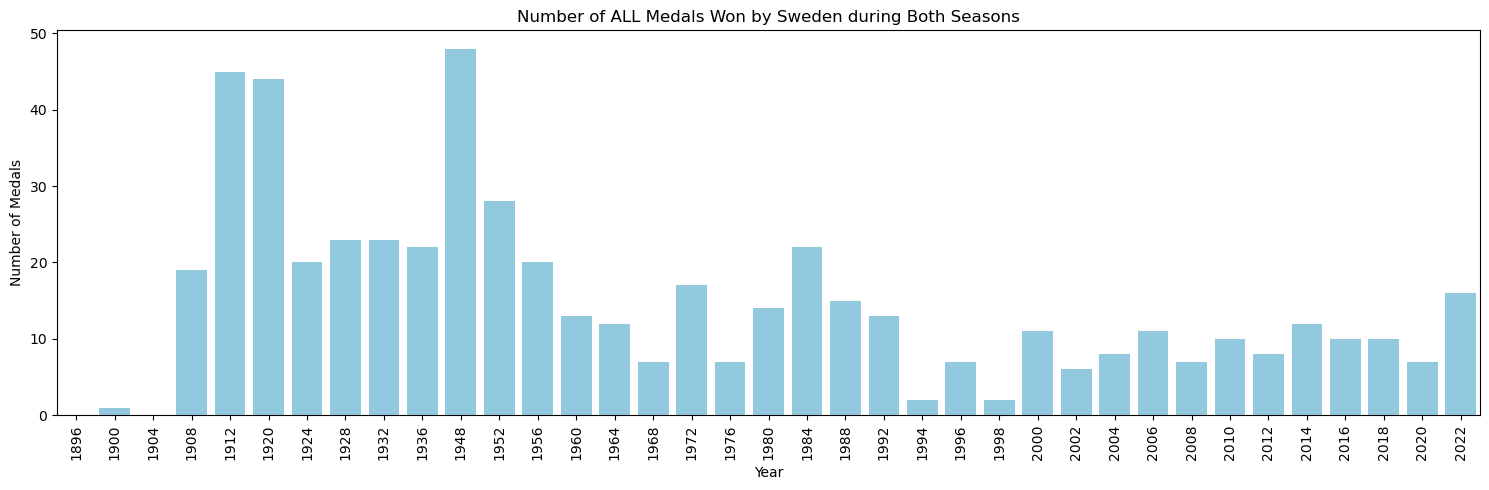

[0, 1, 0, 19, 45, 44, 20, 23, 23, 22, 48, 28, 20, 13, 12, 7, 17, 7, 14, 22, 15, 13, 2, 7, 2, 11, 6, 8, 11, 7, 10, 8, 12, 10, 10, 7, 16]


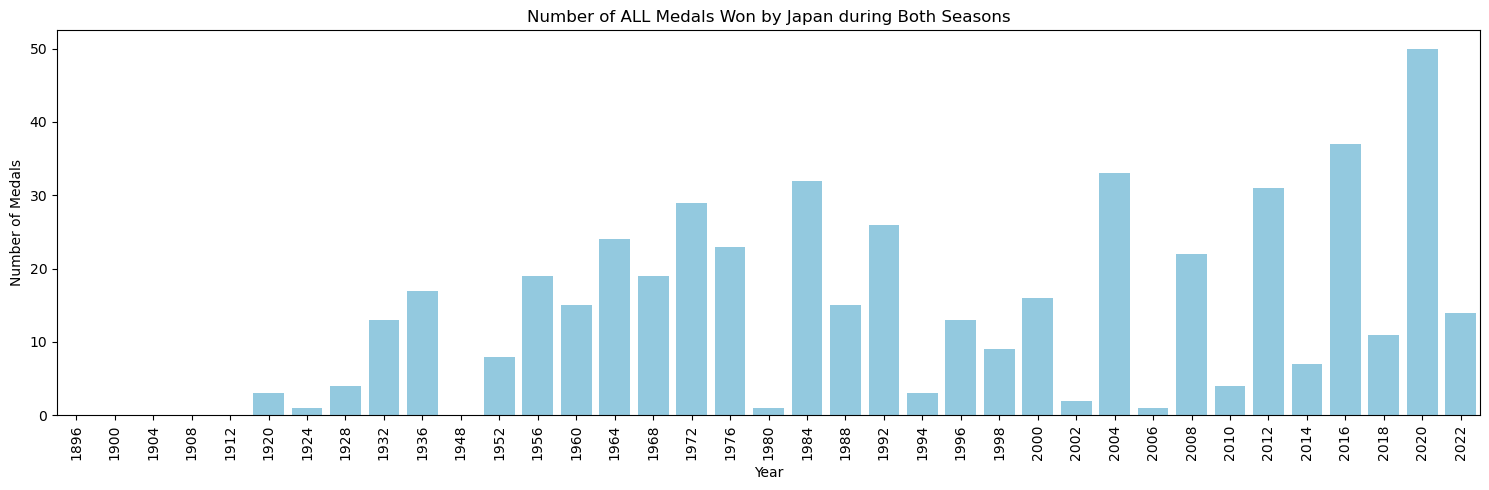

[0, 0, 0, 0, 0, 3, 1, 4, 13, 17, 0, 8, 19, 15, 24, 19, 29, 23, 1, 32, 15, 26, 3, 13, 9, 16, 2, 33, 1, 22, 4, 31, 7, 37, 11, 50, 14]


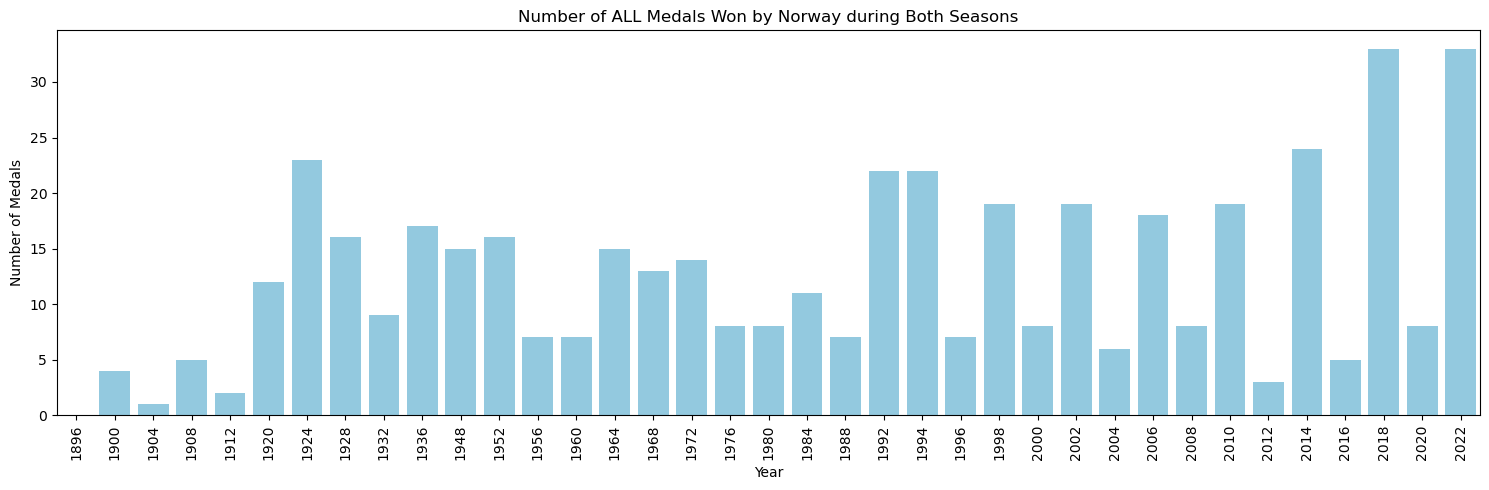

[0, 4, 1, 5, 2, 12, 23, 16, 9, 17, 15, 16, 7, 7, 15, 13, 14, 8, 8, 11, 7, 22, 22, 7, 19, 8, 19, 6, 18, 8, 19, 3, 24, 5, 33, 8, 33]


In [29]:
plot_trends('USA', 'ALL', 'Both Seasons')
plot_trends('Germany', 'ALL', 'Both Seasons')
plot_trends('Soviet Union', 'ALL', 'Both Seasons')
plot_trends('Great Britain', 'ALL', 'Both Seasons')
plot_trends('China', 'ALL', 'Both Seasons')
plot_trends('France', 'ALL', 'Both Seasons')
plot_trends('Italy', 'ALL', 'Both Seasons')
plot_trends('Sweden', 'ALL', 'Both Seasons')
plot_trends('Japan', 'ALL', 'Both Seasons')
plot_trends('Norway', 'ALL', 'Both Seasons')

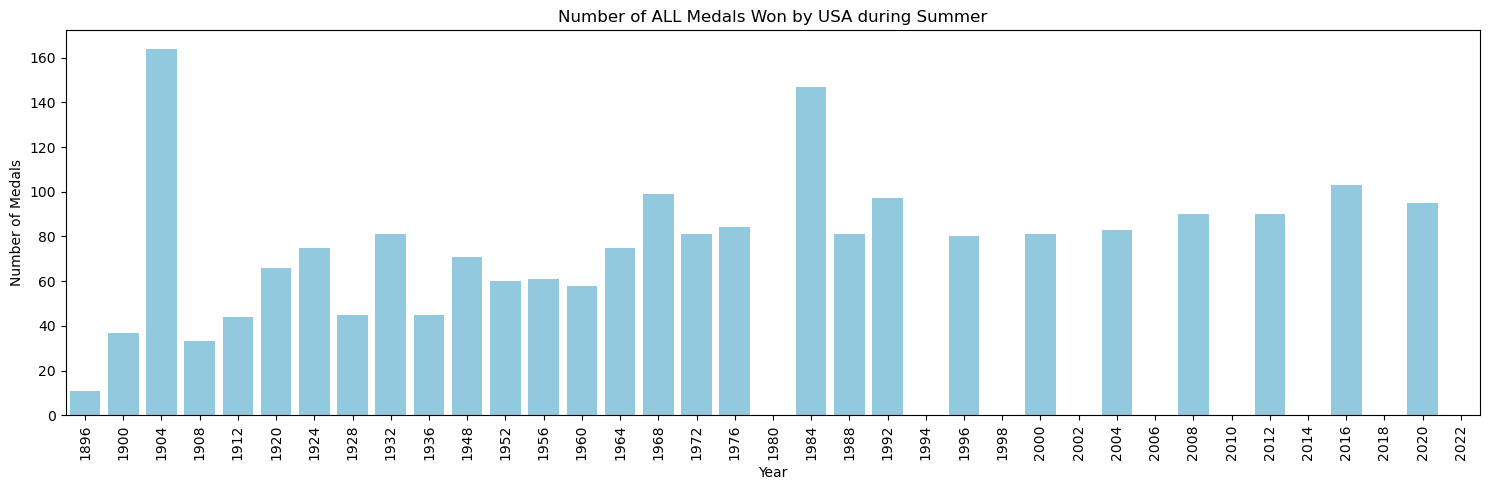

[11, 37, 164, 33, 44, 66, 75, 45, 81, 45, 71, 60, 61, 58, 75, 99, 81, 84, 0, 147, 81, 97, 0, 80, 0, 81, 0, 83, 0, 90, 0, 90, 0, 103, 0, 95, 0]


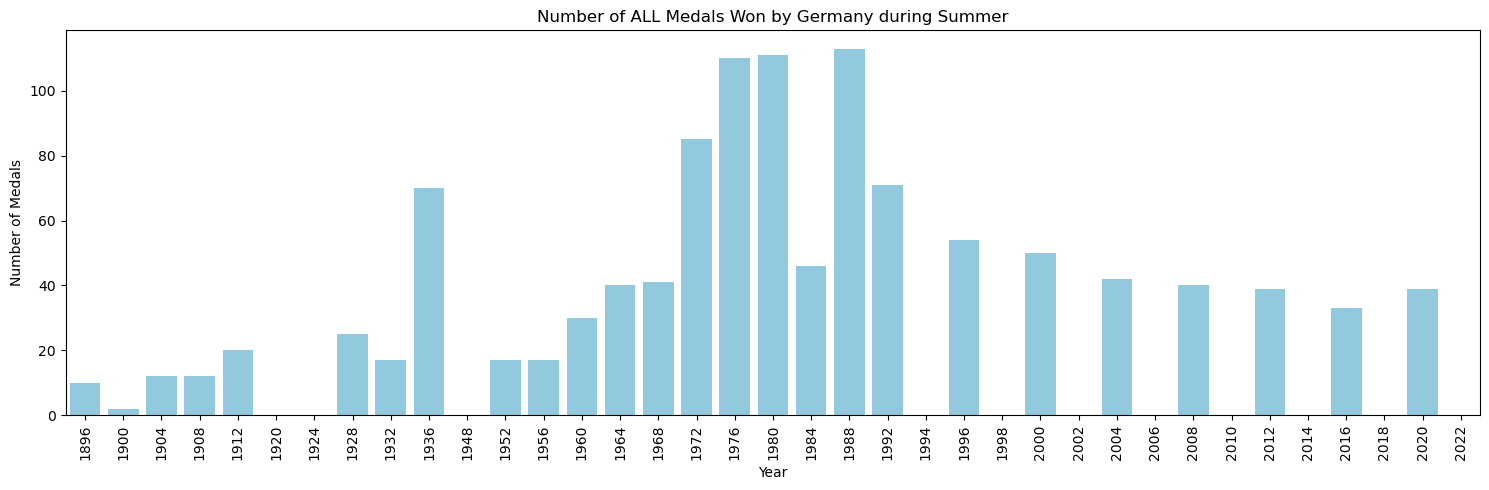

[10, 2, 12, 12, 20, 0, 0, 25, 17, 70, 0, 17, 17, 30, 40, 41, 85, 110, 111, 46, 113, 71, 0, 54, 0, 50, 0, 42, 0, 40, 0, 39, 0, 33, 0, 39, 0]


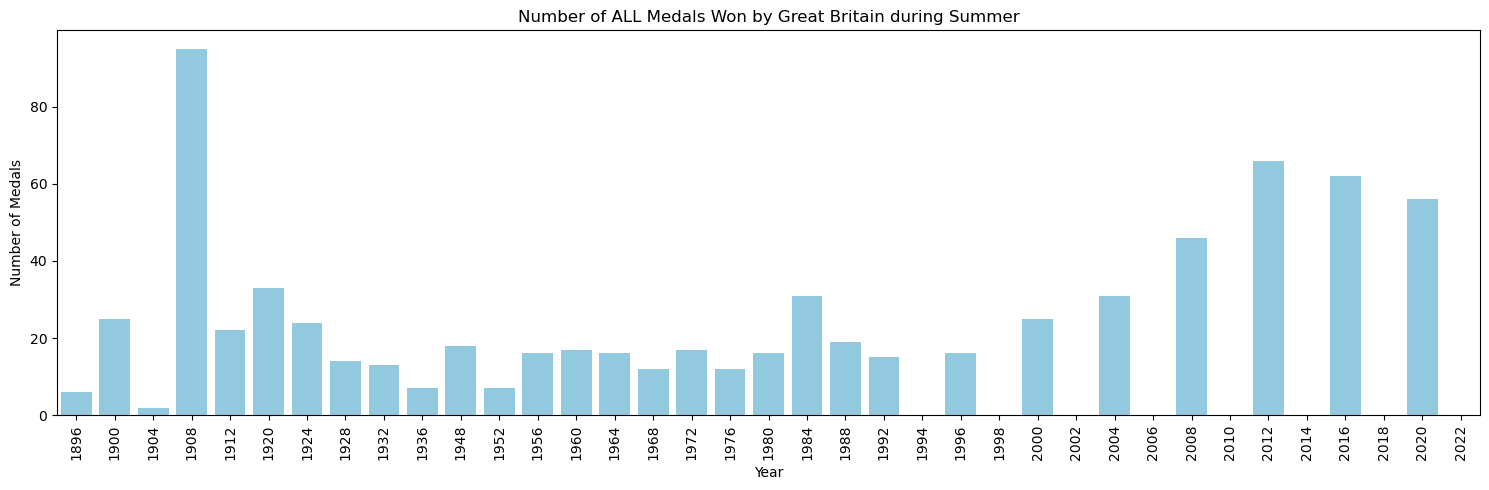

[6, 25, 2, 95, 22, 33, 24, 14, 13, 7, 18, 7, 16, 17, 16, 12, 17, 12, 16, 31, 19, 15, 0, 16, 0, 25, 0, 31, 0, 46, 0, 66, 0, 62, 0, 56, 0]


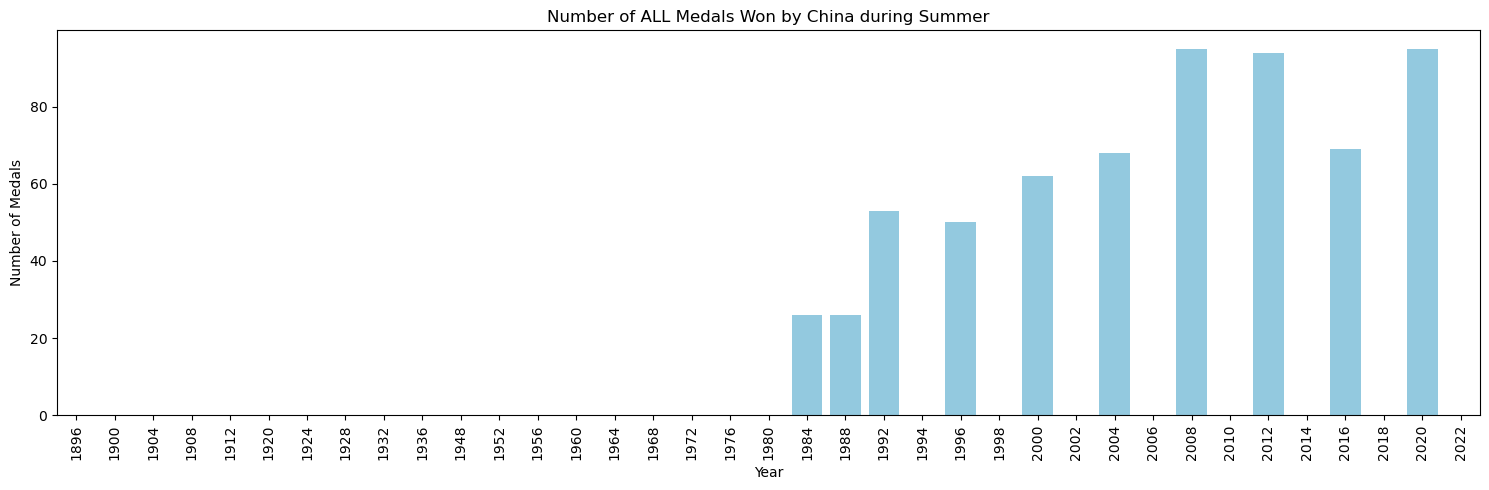

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 53, 0, 50, 0, 62, 0, 68, 0, 95, 0, 94, 0, 69, 0, 95, 0]


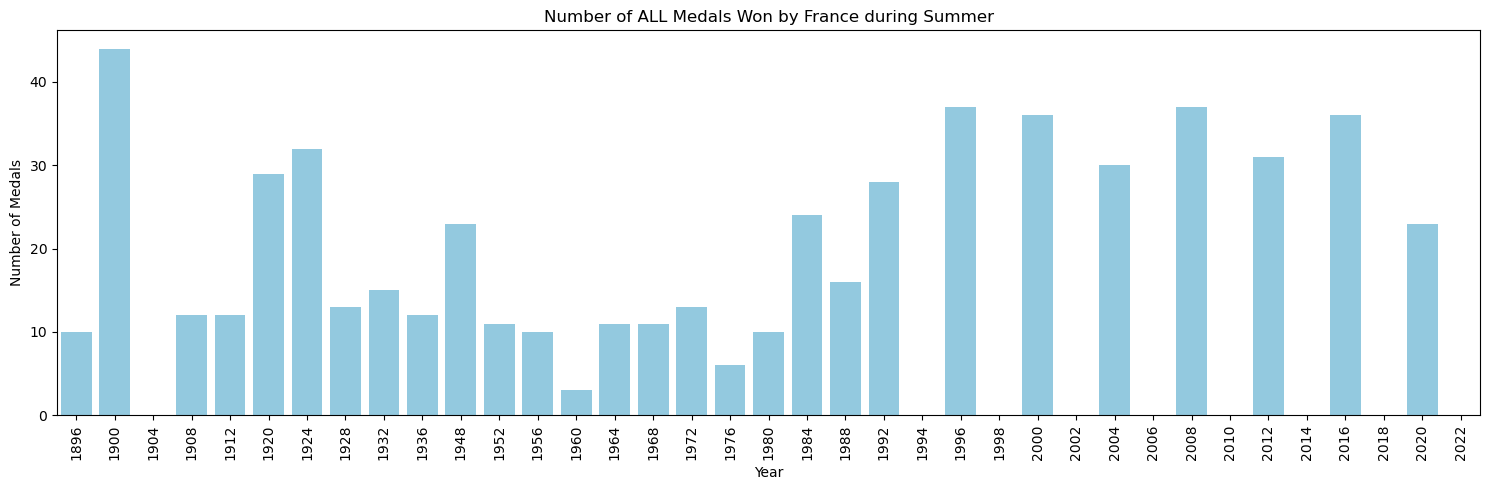

[10, 44, 0, 12, 12, 29, 32, 13, 15, 12, 23, 11, 10, 3, 11, 11, 13, 6, 10, 24, 16, 28, 0, 37, 0, 36, 0, 30, 0, 37, 0, 31, 0, 36, 0, 23, 0]


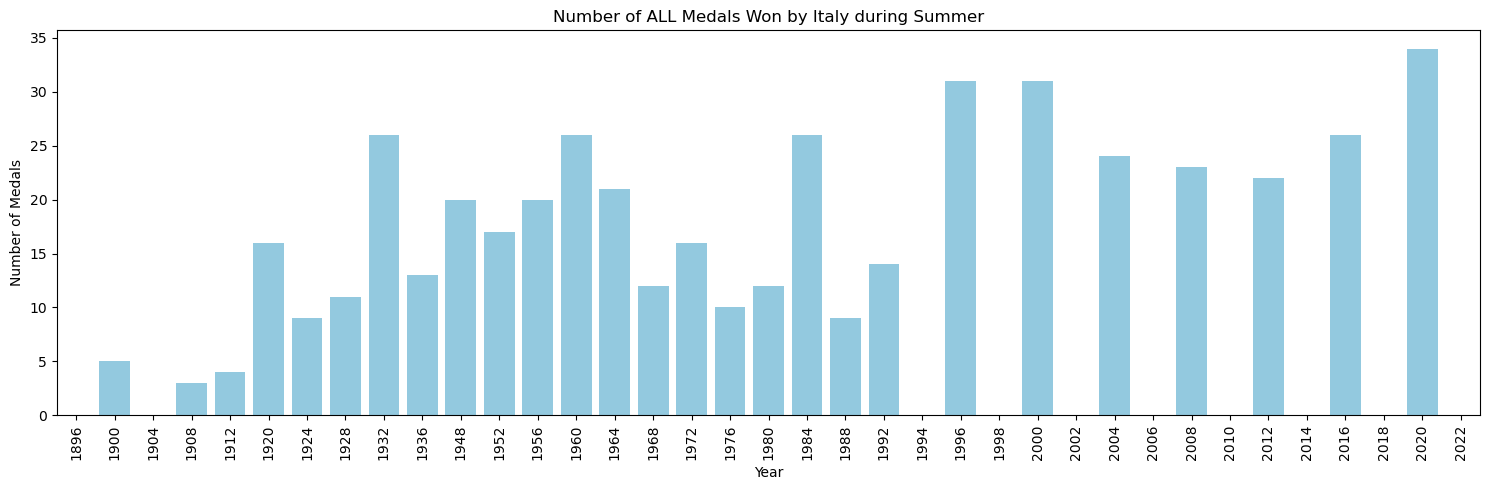

[0, 5, 0, 3, 4, 16, 9, 11, 26, 13, 20, 17, 20, 26, 21, 12, 16, 10, 12, 26, 9, 14, 0, 31, 0, 31, 0, 24, 0, 23, 0, 22, 0, 26, 0, 34, 0]


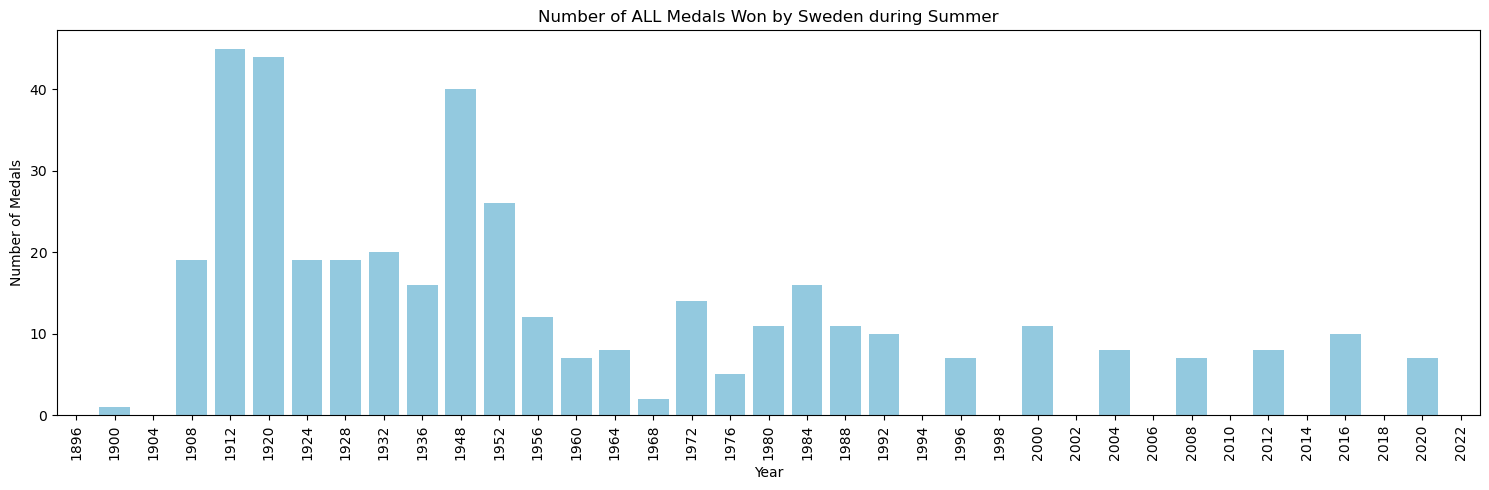

[0, 1, 0, 19, 45, 44, 19, 19, 20, 16, 40, 26, 12, 7, 8, 2, 14, 5, 11, 16, 11, 10, 0, 7, 0, 11, 0, 8, 0, 7, 0, 8, 0, 10, 0, 7, 0]


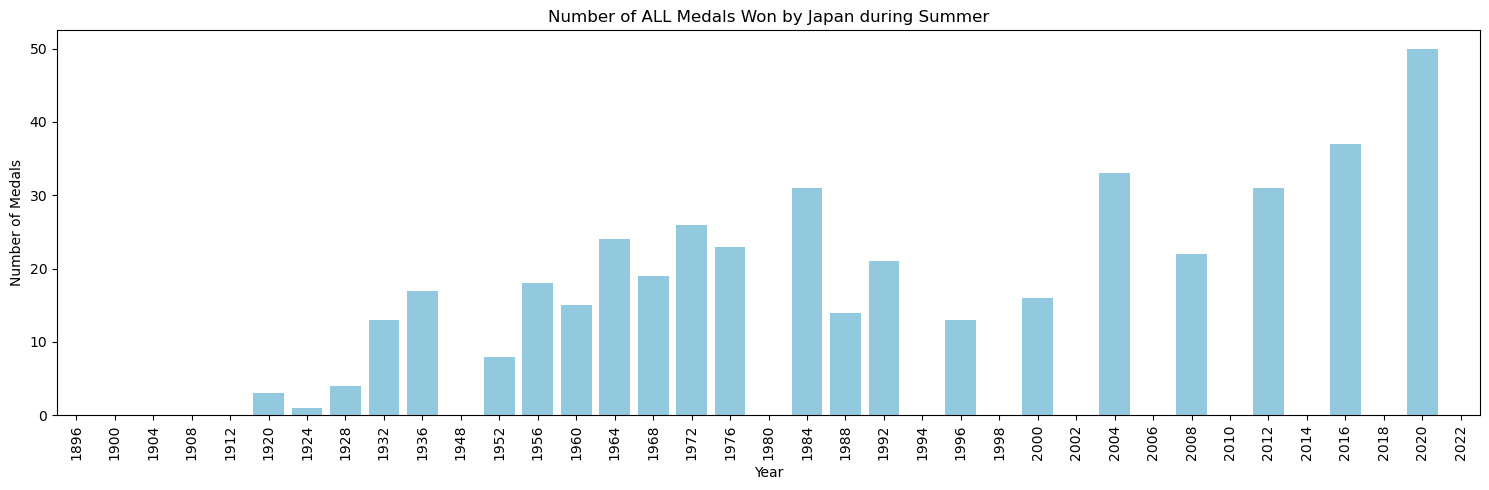

[0, 0, 0, 0, 0, 3, 1, 4, 13, 17, 0, 8, 18, 15, 24, 19, 26, 23, 0, 31, 14, 21, 0, 13, 0, 16, 0, 33, 0, 22, 0, 31, 0, 37, 0, 50, 0]


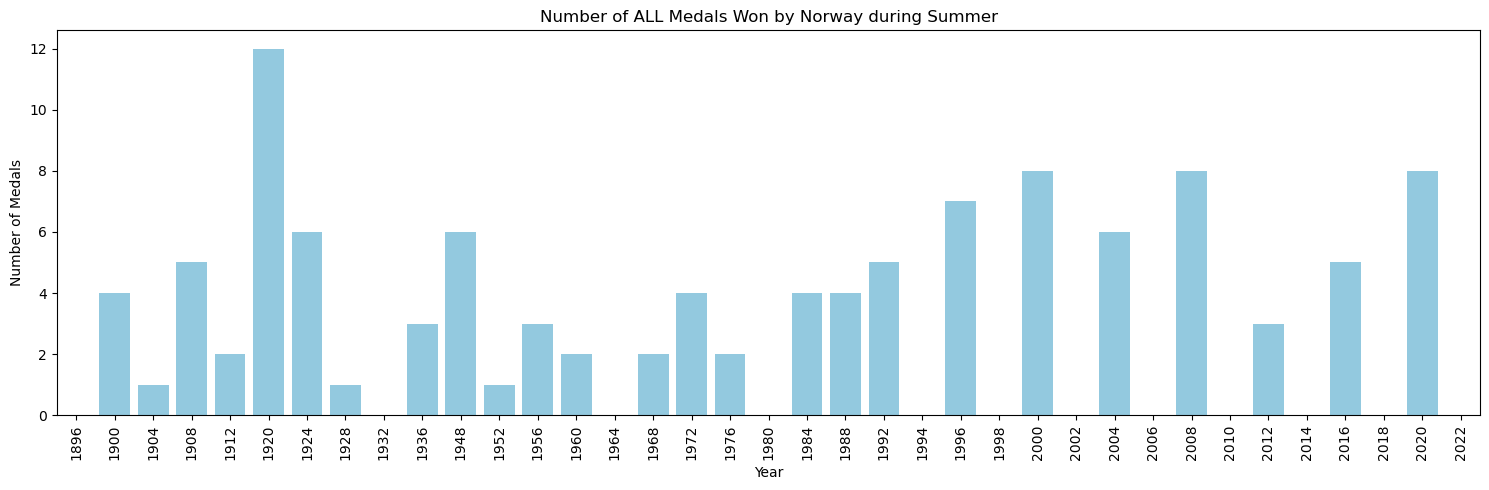

[0, 4, 1, 5, 2, 12, 6, 1, 0, 3, 6, 1, 3, 2, 0, 2, 4, 2, 0, 4, 4, 5, 0, 7, 0, 8, 0, 6, 0, 8, 0, 3, 0, 5, 0, 8, 0]


In [30]:
plot_trends('USA', 'ALL', 'Summer')
plot_trends('Germany', 'ALL', 'Summer')
plot_trends('Great Britain', 'ALL', 'Summer')
plot_trends('China', 'ALL', 'Summer')
plot_trends('France', 'ALL', 'Summer')
plot_trends('Italy', 'ALL', 'Summer')
plot_trends('Sweden', 'ALL', 'Summer')
plot_trends('Japan', 'ALL', 'Summer')
plot_trends('Norway', 'ALL', 'Summer')

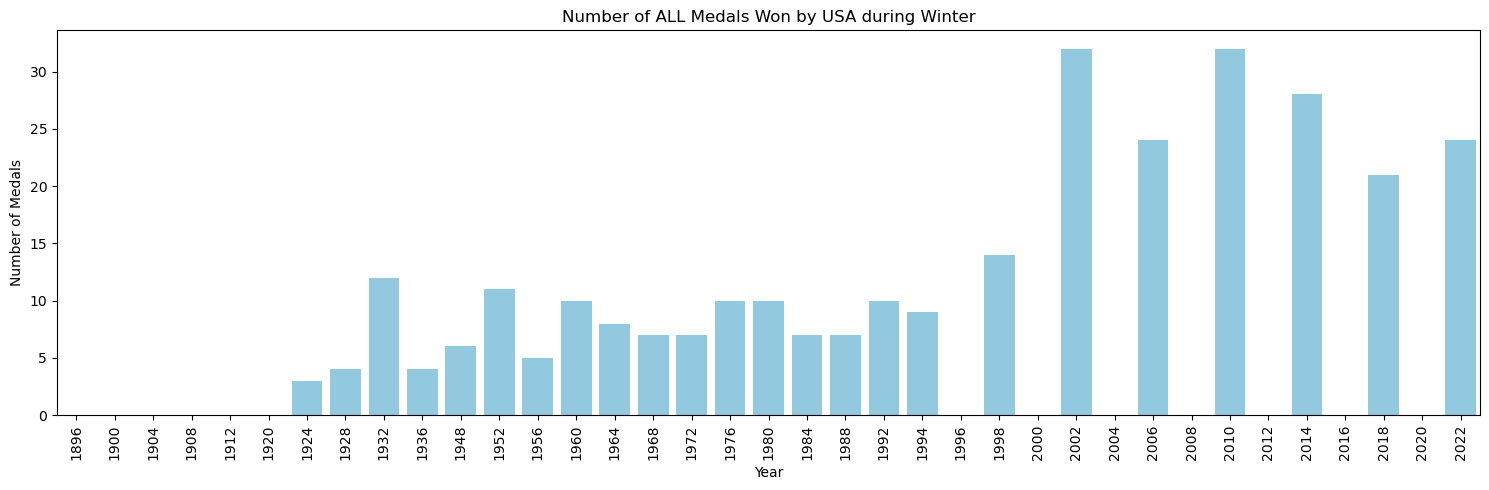

[0, 0, 0, 0, 0, 0, 3, 4, 12, 4, 6, 11, 5, 10, 8, 7, 7, 10, 10, 7, 7, 10, 9, 0, 14, 0, 32, 0, 24, 0, 32, 0, 28, 0, 21, 0, 24]


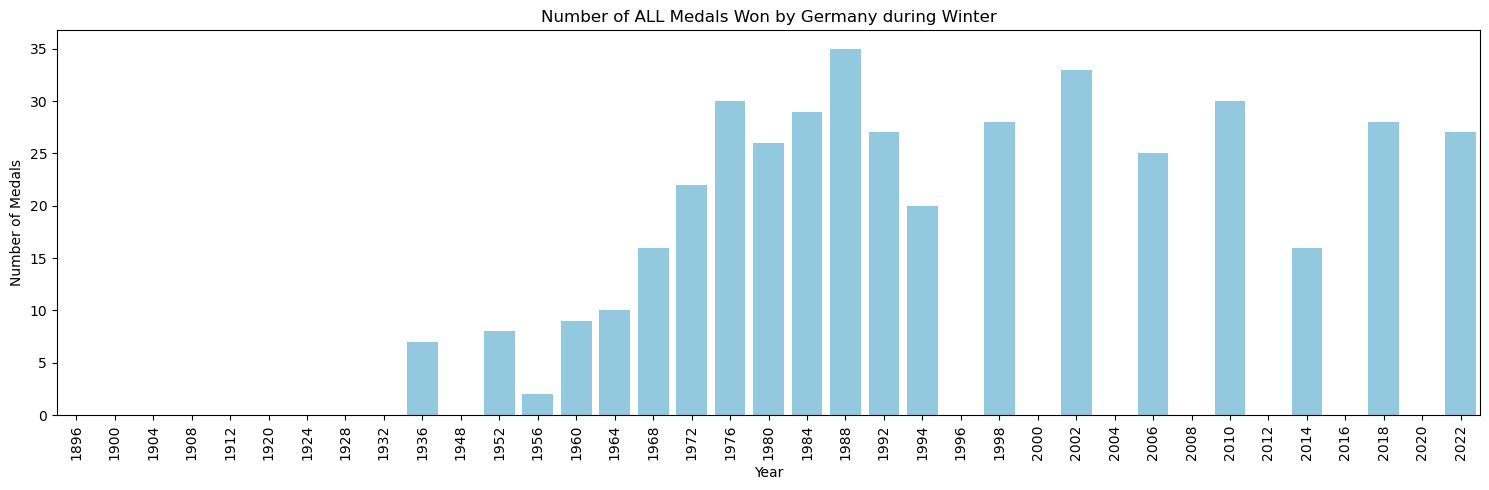

[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 8, 2, 9, 10, 16, 22, 30, 26, 29, 35, 27, 20, 0, 28, 0, 33, 0, 25, 0, 30, 0, 16, 0, 28, 0, 27]


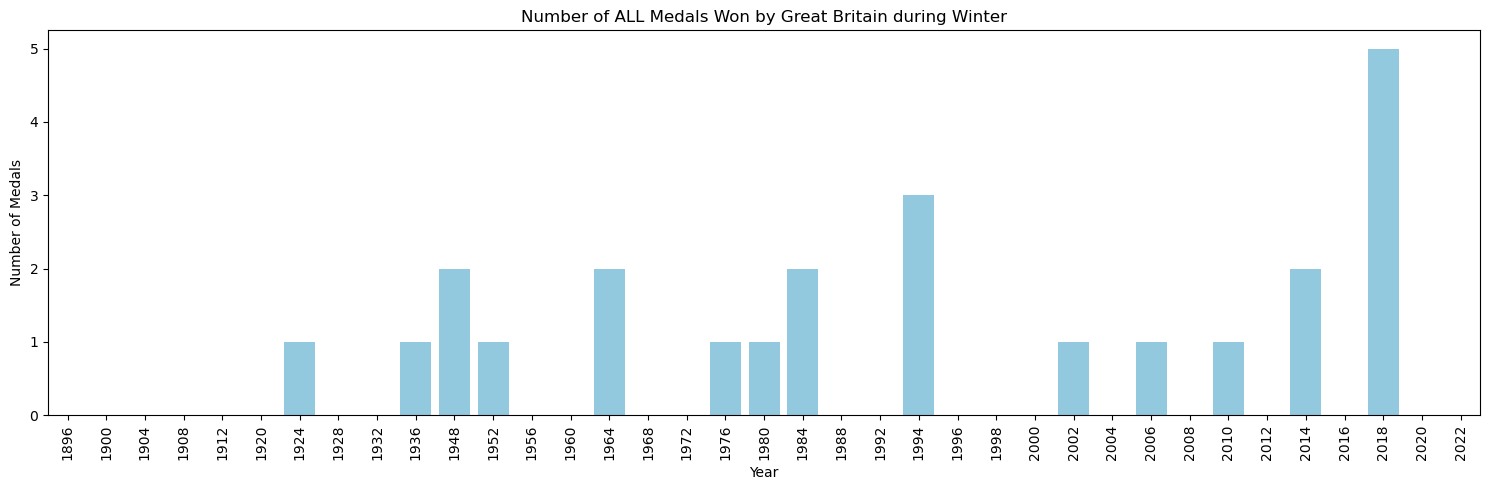

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 5, 0, 0]


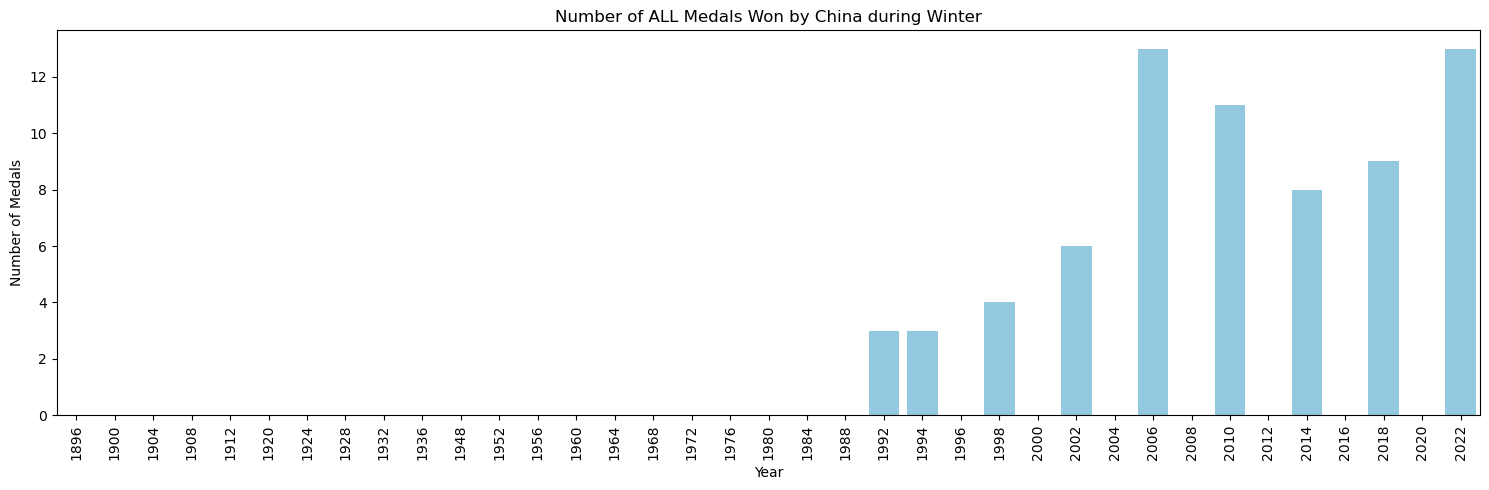

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 0, 6, 0, 13, 0, 11, 0, 8, 0, 9, 0, 13]


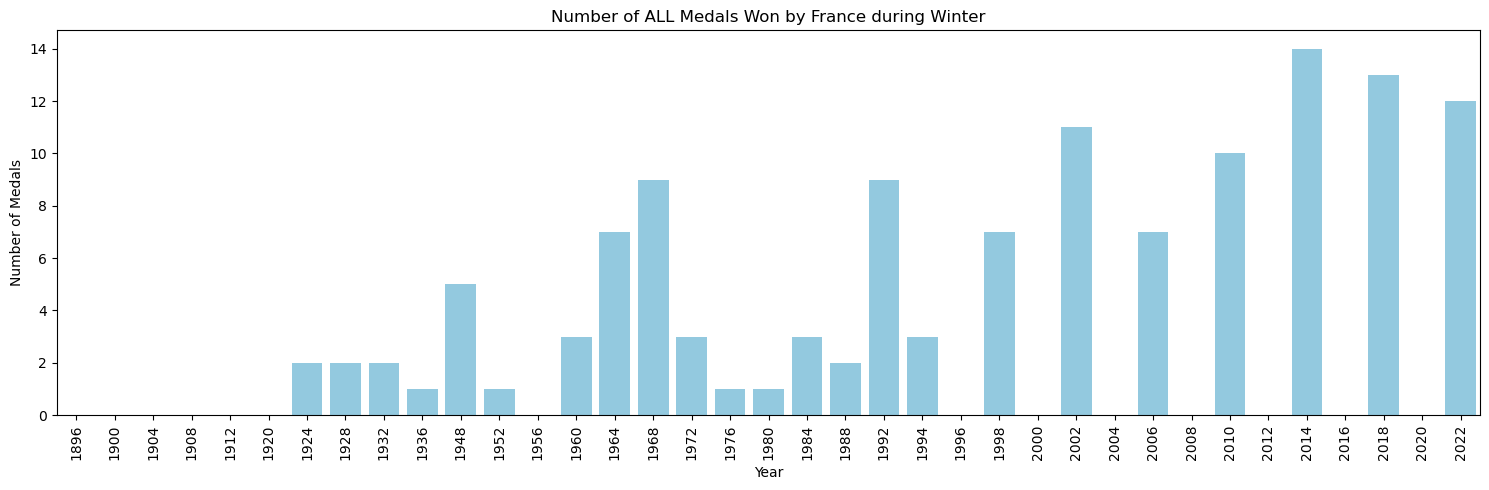

[0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 5, 1, 0, 3, 7, 9, 3, 1, 1, 3, 2, 9, 3, 0, 7, 0, 11, 0, 7, 0, 10, 0, 14, 0, 13, 0, 12]


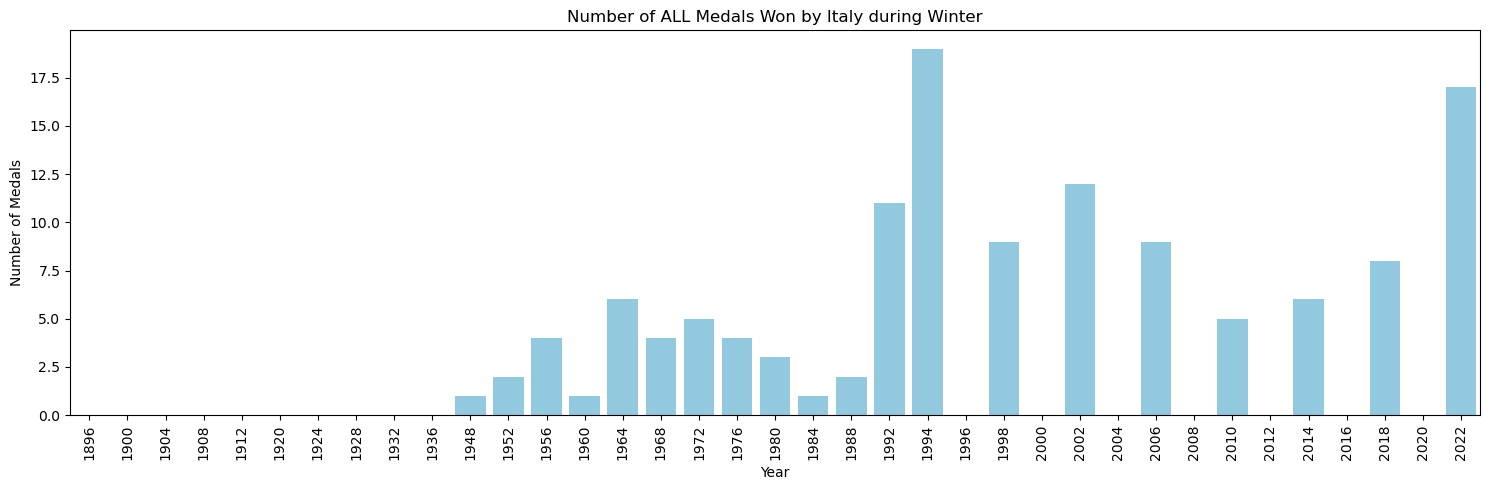

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 1, 6, 4, 5, 4, 3, 1, 2, 11, 19, 0, 9, 0, 12, 0, 9, 0, 5, 0, 6, 0, 8, 0, 17]


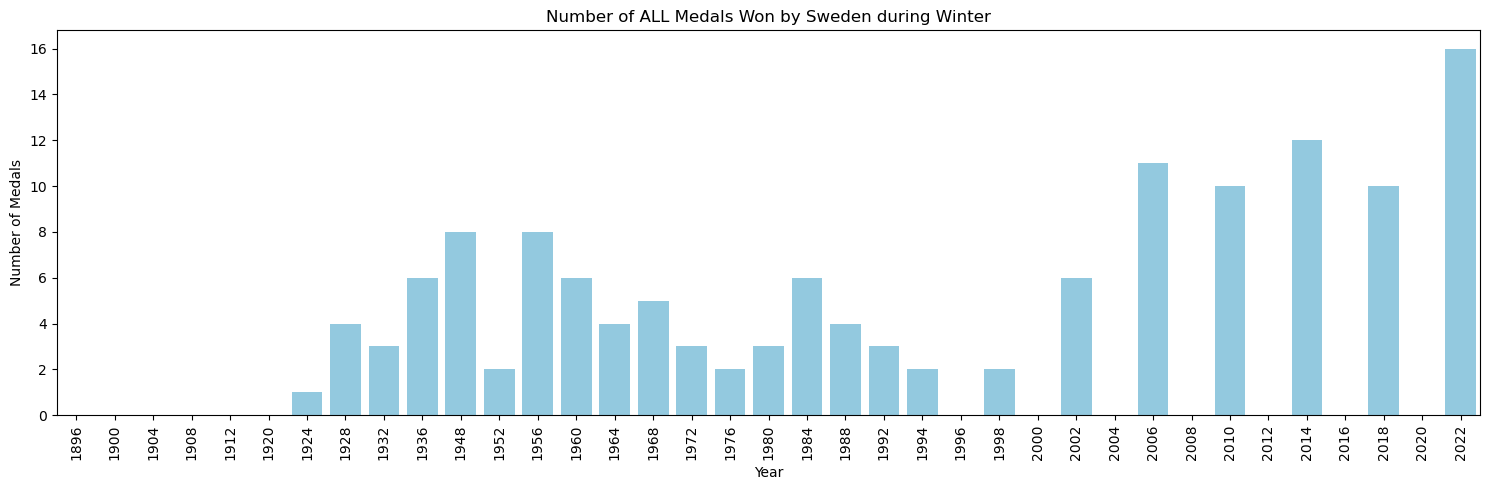

[0, 0, 0, 0, 0, 0, 1, 4, 3, 6, 8, 2, 8, 6, 4, 5, 3, 2, 3, 6, 4, 3, 2, 0, 2, 0, 6, 0, 11, 0, 10, 0, 12, 0, 10, 0, 16]


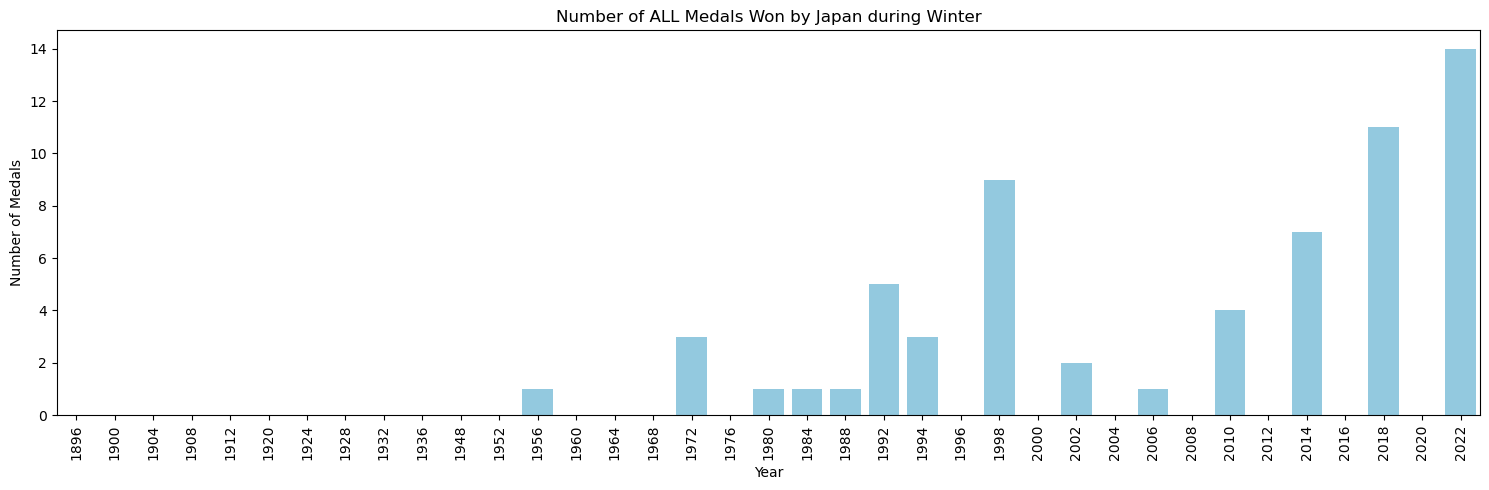

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 1, 5, 3, 0, 9, 0, 2, 0, 1, 0, 4, 0, 7, 0, 11, 0, 14]


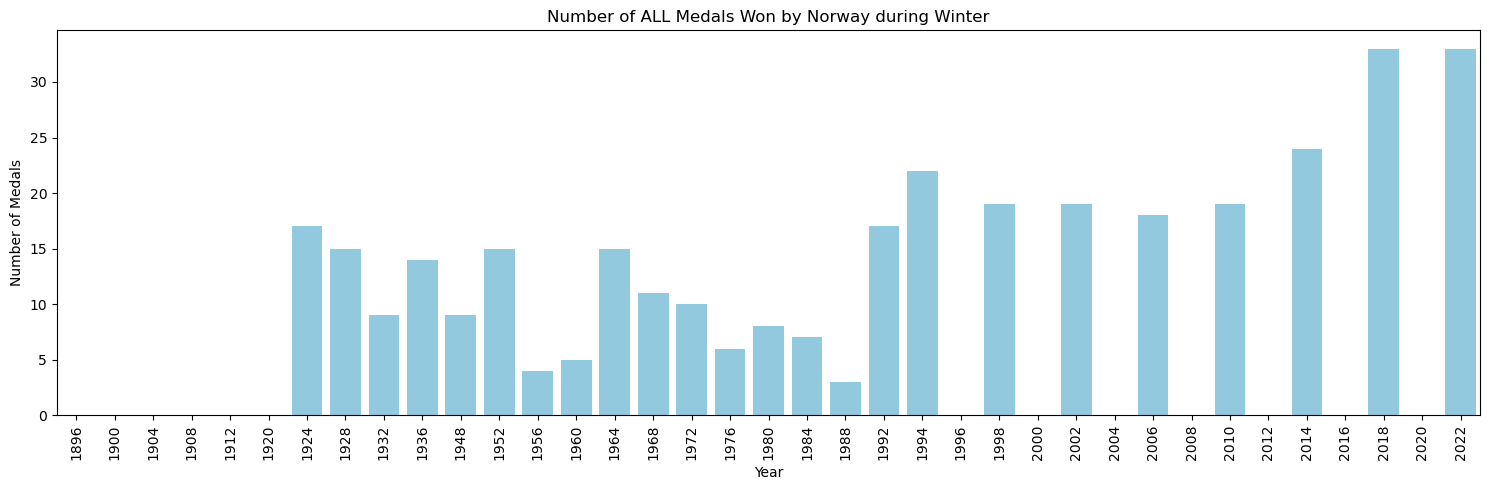

[0, 0, 0, 0, 0, 0, 17, 15, 9, 14, 9, 15, 4, 5, 15, 11, 10, 6, 8, 7, 3, 17, 22, 0, 19, 0, 19, 0, 18, 0, 19, 0, 24, 0, 33, 0, 33]


In [31]:
plot_trends('USA', 'ALL', 'Winter')
plot_trends('Germany', 'ALL', 'Winter')
plot_trends('Great Britain', 'ALL', 'Winter')
plot_trends('China', 'ALL', 'Winter')
plot_trends('France', 'ALL', 'Winter')
plot_trends('Italy', 'ALL', 'Winter')
plot_trends('Sweden', 'ALL', 'Winter')
plot_trends('Japan', 'ALL', 'Winter')
plot_trends('Norway', 'ALL', 'Winter')

In [32]:
def get_medal_counts_for_countries(countries, medals, season):
    medal_counts_dict = {}
    years = set()
    
    for country in countries:
        medal_counts_dict[country] = get_medal_counts(country, medals, season)
        years.update(medal_counts_dict[country].keys())

    medal_counts_df = pd.DataFrame(index = sorted(years), columns = countries)
     
    for country in countries:
        for year, count in medal_counts_dict[country].items():
            medal_counts_df.at[year, country] = count
            
    medal_counts_df = medal_counts_df.astype(int)

    return medal_counts_df

def get_medal_counts(country, medals, season):
    year_counts = pd.DataFrame(columns = ('index', 'game_year'))
    year_counts['index'] = olympic_data['game_year'].unique()
    year_counts['game_year'] = 0
    year_counts = year_counts.sort_values(by = 'index')

    if (medals == 'ALL') and (season == 'Both Seasons'):
        filtered_data = olympic_data[(olympic_data['country_name'] == country)]
    elif (medals == 'ALL') or (season == 'Both Seasons'):
        filtered_data = olympic_data[(olympic_data['country_name'] == country) &
                                     ((olympic_data['game_season'] == season) |
                                      (olympic_data['medal_type'] == medals))]
    else:
        filtered_data = olympic_data[(olympic_data['country_name'] == country) &
                                     (olympic_data['game_season'] == season) &
                                     (olympic_data['medal_type'] == medals)]

    medal_counts = filtered_data['game_year'].value_counts().to_dict()

    for year, count in medal_counts.items():
        year_counts.loc[year_counts['index'] == year, 'game_year'] = count

    medal_counts = year_counts.set_index('index')['game_year'].squeeze()
    
    return medal_counts

# Example usage:
countries = ['USA', 'Germany', 'Soviet Union', 'Great Britain', 'China', 'France', 'Italy', 'Sweden', 'Japan', 'Norway']
medals = "ALL"
season = "Both Seasons"
medal_counts_df = get_medal_counts_for_countries(countries, medals, season)
medal_counts_df.reset_index(inplace = True)
print(medal_counts_df.info())
medal_counts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          37 non-null     int64
 1   USA            37 non-null     int32
 2   Germany        37 non-null     int32
 3   Soviet Union   37 non-null     int32
 4   Great Britain  37 non-null     int32
 5   China          37 non-null     int32
 6   France         37 non-null     int32
 7   Italy          37 non-null     int32
 8   Sweden         37 non-null     int32
 9   Japan          37 non-null     int32
 10  Norway         37 non-null     int32
dtypes: int32(10), int64(1)
memory usage: 1.9 KB
None


index  USA  Germany  Soviet Union  Great Britain  China  France  Italy  \
0   1896   11       10             0              6      0      10      0   
1   1900   37        2             0             25      0      44      5   
2   1904  164       12             0              2      0       0      0   
3   1908   33       12             0             95      0      12      3   
4   1912   44       20             0             22      0      12      4   

   Sweden  Japan  Norway  
0       0      0       0  
1       1      0       4  
2       0      0       1  
3      19      0       5  
4      45      0       2

Looking at which countries have a better performance in certain disciplines.

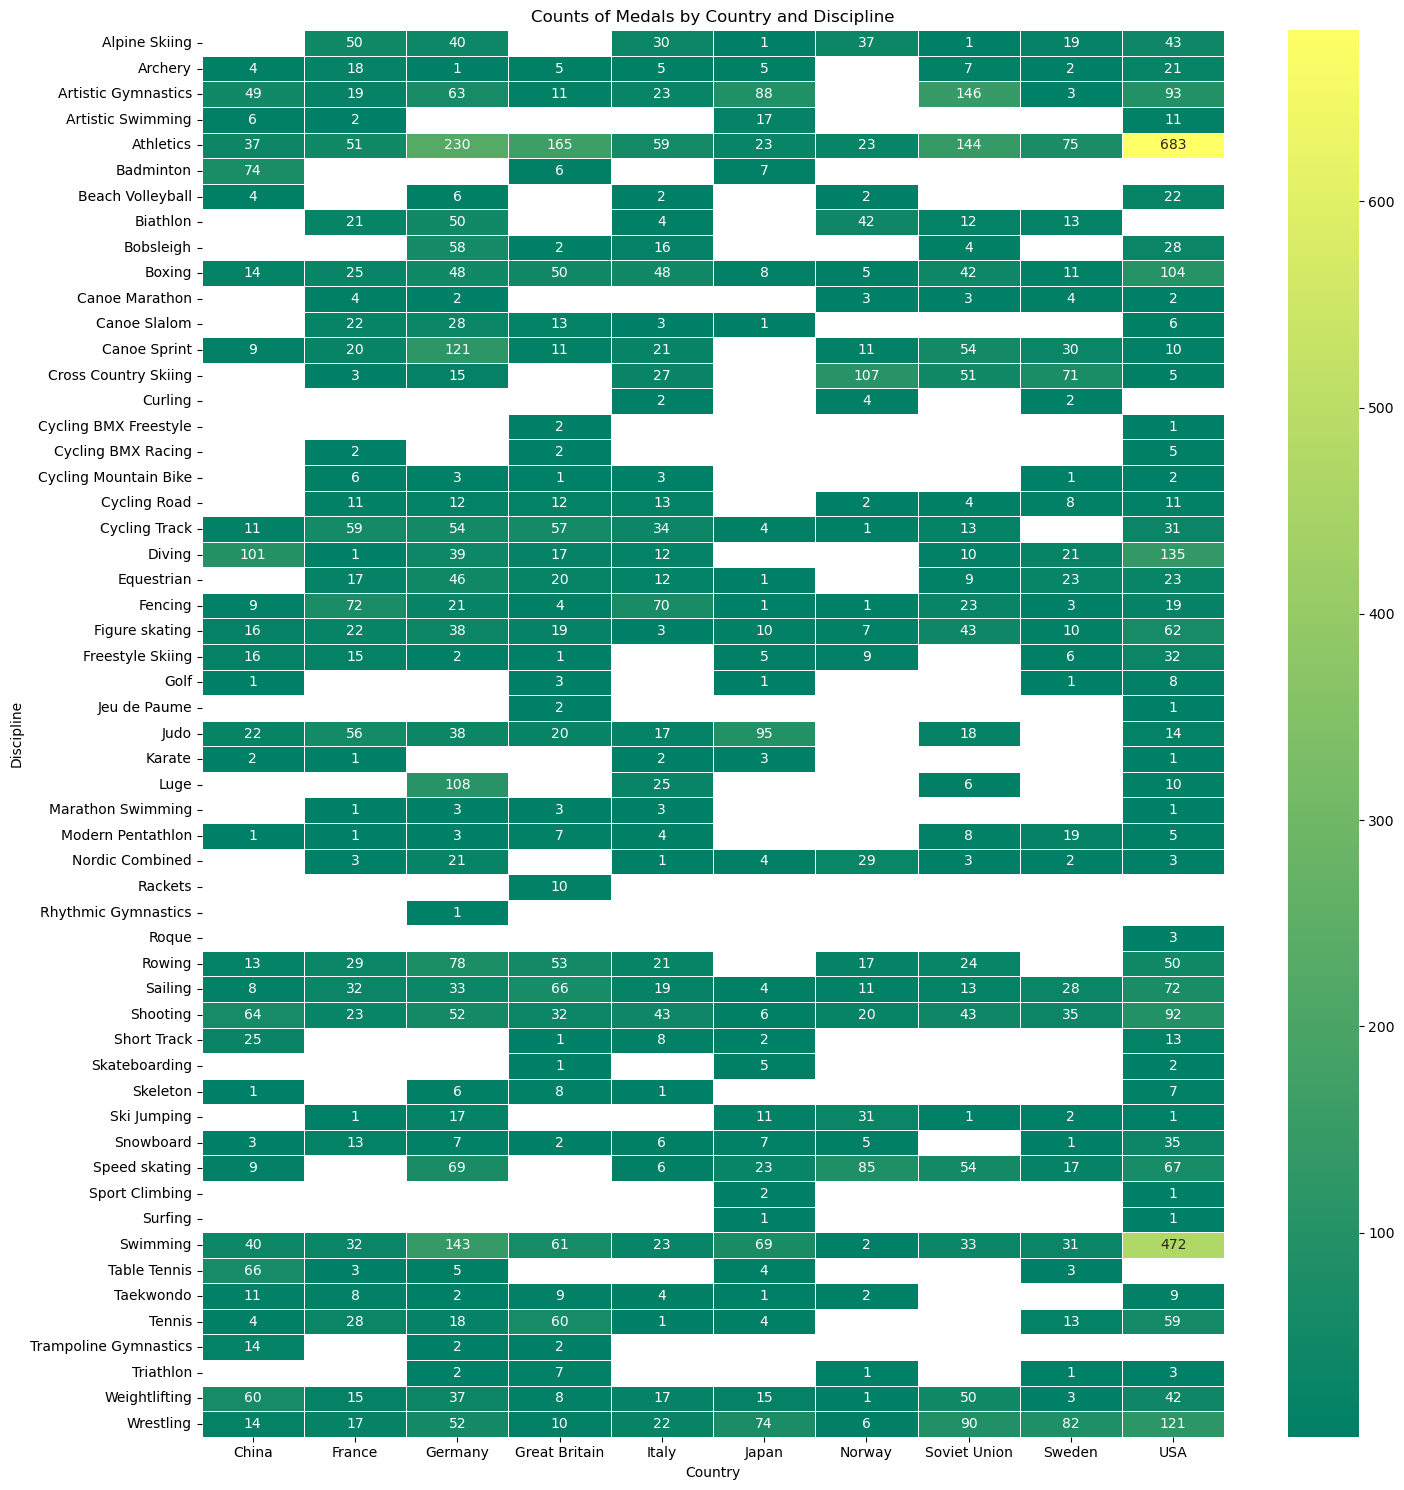

In [33]:
filtered_data = olympic_data[olympic_data['country_name'].isin(countries)]

medal_counts = filtered_data.groupby(['discipline_title', 'country_name']).size().unstack(fill_value = 0)

plt.figure(figsize = (15, 15))
mask = medal_counts == 0
cmap = sns.color_palette('summer', as_cmap = True)
sns.heatmap(medal_counts, annot = True, cmap = cmap, fmt = 'g', linewidths = .5, cbar = True, mask = mask, cbar_kws = {'format': '%d'})
cmap.set_bad(color = 'white')

plt.title('Counts of Medals by Country and Discipline')
plt.xlabel('Country')
plt.ylabel('Discipline')

plt.tight_layout()
plt.show()

In [34]:
print('Top 3 disciplines and medal counts for each country:')
for country in countries:
    top_disciplines = medal_counts.nlargest(3, country)[country]
    print(f'{country}:')
    for discipline, count in top_disciplines.items():
        print(f' {discipline}: {count}')

Top 3 disciplines and medal counts for each country:
USA:
 Athletics: 683
 Swimming: 472
 Diving: 135
Germany:
 Athletics: 230
 Swimming: 143
 Canoe Sprint: 121
Soviet Union:
 Artistic Gymnastics: 146
 Athletics: 144
 Wrestling: 90
Great Britain:
 Athletics: 165
 Sailing: 66
 Swimming: 61
China:
 Diving: 101
 Badminton: 74
 Table Tennis: 66
France:
 Fencing: 72
 Cycling Track: 59
 Judo: 56
Italy:
 Fencing: 70
 Athletics: 59
 Boxing: 48
Sweden:
 Wrestling: 82
 Athletics: 75
 Cross Country Skiing: 71
Japan:
 Judo: 95
 Artistic Gymnastics: 88
 Wrestling: 74
Norway:
 Cross Country Skiing: 107
 Speed skating: 85
 Biathlon: 42


In [35]:
top_disciplines = []
for country in countries:
    top_disciplines.extend(medal_counts.nlargest(3, country).index)
    
duplicated_disciplines = pd.Series(top_disciplines)[pd.Series(top_disciplines).duplicated()]
duplicated_counts = duplicated_disciplines.value_counts()

print('Duplicated disciplines among the top 3 disciplines for each country:')
print(duplicated_counts)

Duplicated disciplines among the top 3 disciplines for each country:
Athletics               5
Swimming                2
Wrestling               2
Diving                  1
Fencing                 1
Judo                    1
Artistic Gymnastics     1
Cross Country Skiing    1
dtype: int64


Looking to see if there is 'Home Advantage' in the Olympics.

In [81]:
performances = olympic_data.groupby(['game_year', 'country_name', 'game_location']).size().reset_index(name = 'medal_count')

idx = performances.groupby('game_year')['medal_count'].idxmax()
best_performers = performances.loc[idx]

result_df = best_performers.set_index('game_year')[['country_name']]
result_df.rename(columns = {'country_name': 'Best Performing Country'}, inplace = True)
result_df['Location'] = best_performers.set_index('game_year')['game_location']

result_df

Best Performing Country       Location
game_year                                       
1896                       Greece         Greece
1900                       France         France
1904                          USA            USA
1908                Great Britain  Great Britain
1912                       Sweden         Sweden
1920                          USA        Belgium
1924                          USA         France
1928                          USA    Netherlands
1932                          USA            USA
1936                      Germany        Germany
1948                          USA  Great Britain
1952                          USA        Finland
1956                 Soviet Union      Australia
1960                 Soviet Union          Italy
1964                 Soviet Union          Japan
1968                          USA         Mexico
1972                      Germany        Germany
1976                      Germany         Canada
1980                 Soviet Union         Russia
1984                          USA            USA
1988                      Germany    South Korea
1992                          USA          Spain
1994                       Norway         Norway
1996                          USA            USA
1998                      Germany          Japan
2000                          USA      Australia
2002                      Germany            USA
2004                          USA         Greece
2006                      Germany          Italy
2008                        China          China
2010                          USA         Canada
2012                        China  Great Britain
2014                          USA         Russia
2016                          USA         Brazil
2018                       Norway    South Korea
2020                        China          Japan
2022                       Norway          China

In [87]:
count_df = result_df[result_df['Best Performing Country'] == result_df['Location']].groupby('Best Performing Country').size().reset_index(name = 'Home Advantage Count')
count_df = count_df.sort_values(by = 'Home Advantage Count', ascending = False)
count_df

Best Performing Country  Home Advantage Count
7                     USA                     4
2                 Germany                     2
0                   China                     1
1                  France                     1
3           Great Britain                     1
4                  Greece                     1
5                  Norway                     1
6                  Sweden                     1

Looking at the most decorated Olympic Athletes.

In [37]:
medals_from_athletes = olympic_data.groupby(['athlete_full_name', 'participant_type', 'country_name']).size().reset_index(name = 'medal_count')

medals_from_athletes = medals_from_athletes.sort_values(by = ['participant_type', 'medal_count'], ascending = [True, False])

top_10_athletes = {}
for types in medals_from_athletes['participant_type'].unique():
    top_10_athletes[types] = medals_from_athletes[medals_from_athletes['participant_type'] == types].head(10)
    
top_athletes = {}
for types, df in top_10_athletes.items():
    top_athletes[types] = pd.DataFrame(df)

In [38]:
top_athletes['Athlete']

athlete_full_name participant_type        country_name  medal_count
7963         Michael PHELPS          Athlete                 USA           16
6702        Larisa LATYNINA          Athlete        Soviet Union           14
8530      Nikolay ANDRIANOV          Athlete        Soviet Union           12
396            Alexei NEMOV          Athlete  Russian Federation           10
1485         Boris SHAKHLIN          Athlete        Soviet Union           10
4915             Ireen WÜST          Athlete         Netherlands           10
7529         Marit BJOERGEN          Athlete              Norway           10
10821           Takashi ONO          Athlete               Japan           10
1427          Björn DAEHLIE          Athlete              Norway            9
8682   Ole Einar BJØRNDALEN          Athlete              Norway            9

In [39]:
top_athletes['GameTeam']

athlete_full_name participant_type country_name  medal_count
5043       Ivan PATZAICHIN         GameTeam      Romania            6
968          Antonio ROSSI         GameTeam        Italy            4
1409        Birgit FISCHER         GameTeam      Germany            4
2799   Elana MEYERS TAYLOR         GameTeam          USA            4
4041     Gunnar SETTERWALL         GameTeam       Sweden            4
5078             Iztok COP         GameTeam     Slovenia            4
5217          Jan BEHRENDT         GameTeam      Germany            4
6249        Katalin KOVACS         GameTeam      Hungary            4
6316             Kay BLUHM         GameTeam      Germany            4
6400  Kerri WALSH JENNINGS         GameTeam          USA            4

Looking at how many times a participation from these athletes would result in a gold medal.

In [40]:
gold_data = olympic_data[olympic_data['medal_type'] == 'GOLD']

gold_summary = gold_data.groupby('athlete_full_name').agg({
    'event_title': 'count',
    'medal_type': 'size'
})
gold_summary.columns = ['event_participations', 'gold_medals']

all_summary = olympic_data.groupby('athlete_full_name').agg({
    'event_title': 'count',
})
all_summary.rename(columns = {'event_title': 'total_event_participations'}, inplace = True)

final_summary = pd.merge(all_summary, gold_summary, on = 'athlete_full_name', how = 'left').fillna(0)
final_summary = final_summary.drop('event_participations', axis = 1)

final_summary['gold_medals'] = final_summary['gold_medals'].astype(int)
final_summary_sorted = final_summary.sort_values(by = 'gold_medals', ascending = False)

final_summary_sorted.head(10)

total_event_participations  gold_medals
athlete_full_name                                         
Michael PHELPS                             16           13
Ray EWRY                                    8            8
Carl LEWIS                                  8            7
Vera CASLAVSKA                              8            7
Boris SHAKHLIN                             10            6
Paavo NURMI                                 9            6
Gert FREDRIKSSON                            7            6
Björn DAEHLIE                               9            6
Lidiya SKOBLIKOVA                           6            6
Larisa LATYNINA                            14            6

Determining the average age in the Olympic Games.

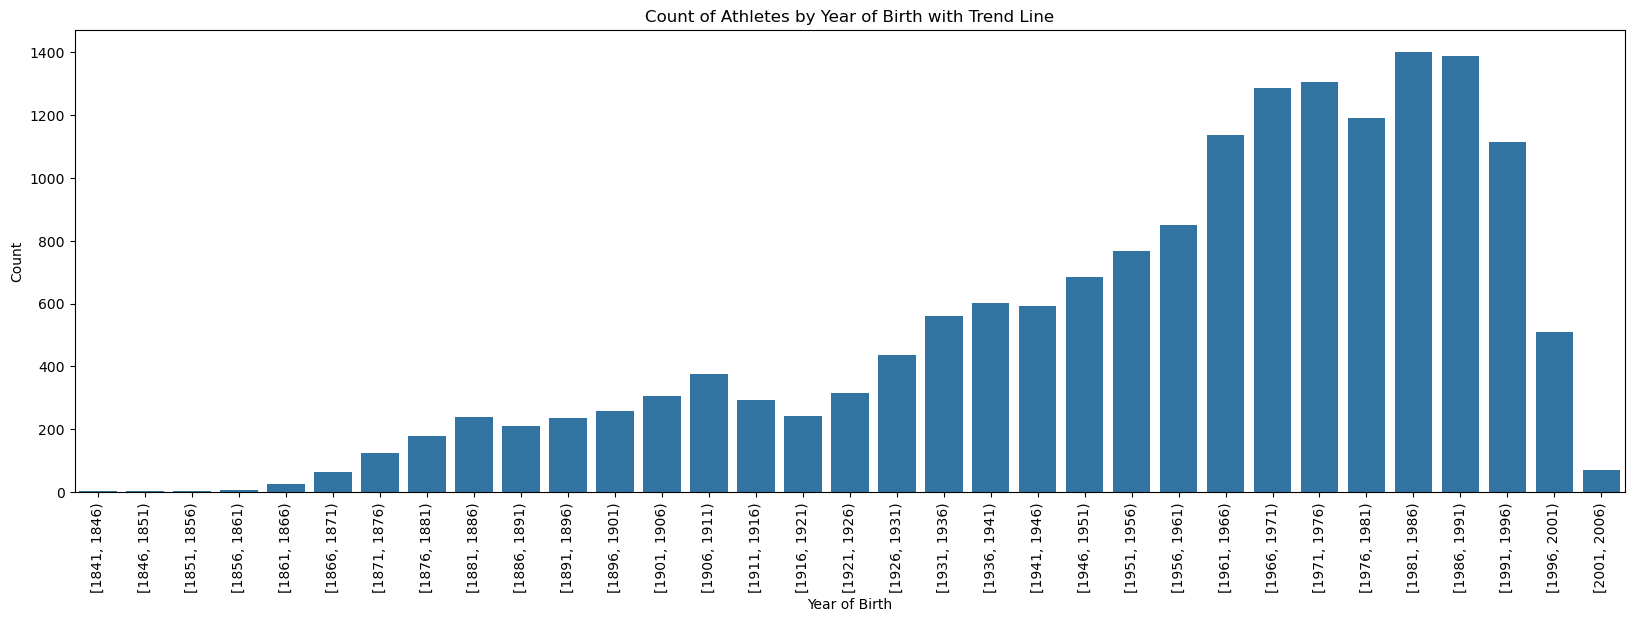

In [41]:
oldest_birth_year = int(min(olympic_data['athlete_year_birth']))
newest_birth_year = int(max(olympic_data['athlete_year_birth']))

birth_year_bins = pd.cut(olympic_data['athlete_year_birth'], bins = range(oldest_birth_year, newest_birth_year + 1, 5), right = False)
birth_year_counts = birth_year_bins.value_counts().sort_index().reset_index()
birth_year_counts.columns = ['Year of Birth', 'Count']

plt.figure(figsize = (20, 6))
sns.barplot(data = birth_year_counts, x = 'Year of Birth', y = 'Count', errorbar = None)

# Customize labels and title
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Count of Athletes by Year of Birth with Trend Line')
plt.xticks(rotation = 90)

plt.show()

Looking at how many times a participation from the young and new athletes would result in a gold medal.

In [42]:
medals_from_athletes = olympic_data.groupby(['athlete_full_name', 'country_name', 'athlete_year_birth']).size().reset_index(name = 'medal_count')

filtered_data = medals_from_athletes[medals_from_athletes['athlete_year_birth'] > 1996]

filtered_medals_from_athletes = filtered_data.sort_values(by = 'medal_count', ascending = False)

In [43]:
combined_data = pd.merge(filtered_medals_from_athletes, final_summary_sorted[['gold_medals']], on = 'athlete_full_name', how = 'left')
combined_data['gold_medals'] = combined_data['gold_medals'].fillna(0).astype(int)

In [44]:
combined_data.sort_values(by = 'gold_medals', ascending = False).head(10)

athlete_full_name country_name  athlete_year_birth  medal_count  \
0      Katie LEDECKY          USA              1997.0            7   
1       Simone BILES          USA              1997.0            5   
7     Ariarne Titmus    Australia              2000.0            3   
21         Chloe KIM          USA              2000.0            2   
18   Daiki HASHIMOTO        Japan              2001.0            2   
44      Robert FINKE          USA              1999.0            2   
9      Minjeong CHOI  South Korea              1998.0            3   
40         Qian YANG        China              2000.0            2   
27            San AN  South Korea              2001.0            2   
5   Ailing Eileen GU        China              2003.0            3   

    gold_medals  
0             6  
1             3  
7             2  
21            2  
18            2  
44            2  
9             2  
40            2  
27            2  
5             2

# Predictions without Time Series Models

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Transposing the dataframe to have the years as the column headers and the countries as the row headers.

In [46]:
country_medal_counts = medal_counts_df.copy()
country_medal_counts.rename(columns = {'index': 'Year'}, inplace = True)
country_medal_counts.head()

Year  USA  Germany  Soviet Union  Great Britain  China  France  Italy  \
0  1896   11       10             0              6      0      10      0   
1  1900   37        2             0             25      0      44      5   
2  1904  164       12             0              2      0       0      0   
3  1908   33       12             0             95      0      12      3   
4  1912   44       20             0             22      0      12      4   

   Sweden  Japan  Norway  
0       0      0       0  
1       1      0       4  
2       0      0       1  
3      19      0       5  
4      45      0       2

In [47]:
country_medal_counts_transposed = country_medal_counts.set_index('Year').transpose()
country_medal_counts_transposed.head()

Year           1896  1900  1904  1908  1912  1920  1924  1928  1932  1936  \
USA              11    37   164    33    44    66    78    49    93    49   
Germany          10     2    12    12    20     0     0    25    17    77   
Soviet Union      0     0     0     0     0     0     0     0     0     0   
Great Britain     6    25     2    95    22    33    25    14    13     8   
China             0     0     0     0     0     0     0     0     0     0   

Year           ...  2004  2006  2008  2010  2012  2014  2016  2018  2020  2022  
USA            ...    83    24    90    32    90    28   103    21    95    24  
Germany        ...    42    25    40    30    39    16    33    28    39    27  
Soviet Union   ...     0     0     0     0     0     0     0     0     0     0  
Great Britain  ...    31     1    46     1    66     2    62     5    56     0  
China          ...    68    13    95    11    94     8    69     9    95    13  

[5 rows x 37 columns]

In [48]:
X = country_medal_counts_transposed.drop(2022, axis = 1)
y = country_medal_counts_transposed[2022]

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

mse_dict = {model_name: [] for model_name, _ in models}

for model_name, model in models:
    model.fit(X, y)
    
    pred_2022 = model.predict(X)
    pred_2022_round = [round(pred) for pred in pred_2022]
    print(pred_2022_round)
    
    mse = mean_squared_error(y, pred_2022_round)
    mse_dict[model_name] = mse

print("\nMean Squared Error for predicting year 2022:")
for model_name, mse in mse_dict.items():
    print(f"{model_name}: {mse}")
    
all_predictions = []

# Iterate over models
for model_name, model in models:
    # Fit the model
    model.fit(X, y)
    
    # Predict the number of medals for the year 2022
    pred_2022 = model.predict(X)
    
    # Round the predictions
    pred_2022_round = [round(pred) for pred in pred_2022]
    
    # Store the predictions
    all_predictions.append(pred_2022_round)

# Ensemble the predictions by averaging
ensemble_pred = [round(sum(preds) / len(preds)) for preds in zip(*all_predictions)]

# Calculate MSE for the ensemble prediction
ensemble_mse = mean_squared_error(y, ensemble_pred)

print(f"\nMean Squared Error for predicting year 2022 (Ensemble): {ensemble_mse}")
print(ensemble_pred)

[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[16, 14, 15, 12, 11, 18, 18, 18, 18, 18]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[24, 25, 3, 6, 13, 14, 17, 15, 14, 27]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]

Mean Squared Error for predicting year 2022:
Linear Regression: 0.0
Ridge Regression: 0.0
Lasso Regression: 0.0
K-Nearest Neighbors: 88.8
Decision Tree: 0.0
Random Forest: 9.0
Gradient Boosting: 0.0

Mean Squared Error for predicting year 2022 (Ensemble): 2.8
[23, 25, 3, 2, 13, 13, 17, 16, 14, 30]


*NOTE:* This shows how this Olympic Dataset is a Time Series Dataset, therefore, these prediction models wouldn't be a good way to predict the future performance of the following countries.

In [49]:
country_medal_counts_transposed[2022]

USA              24
Germany          27
Soviet Union      0
Great Britain     0
China            13
France           12
Italy            17
Sweden           16
Japan            14
Norway           33
Name: 2022, dtype: int32

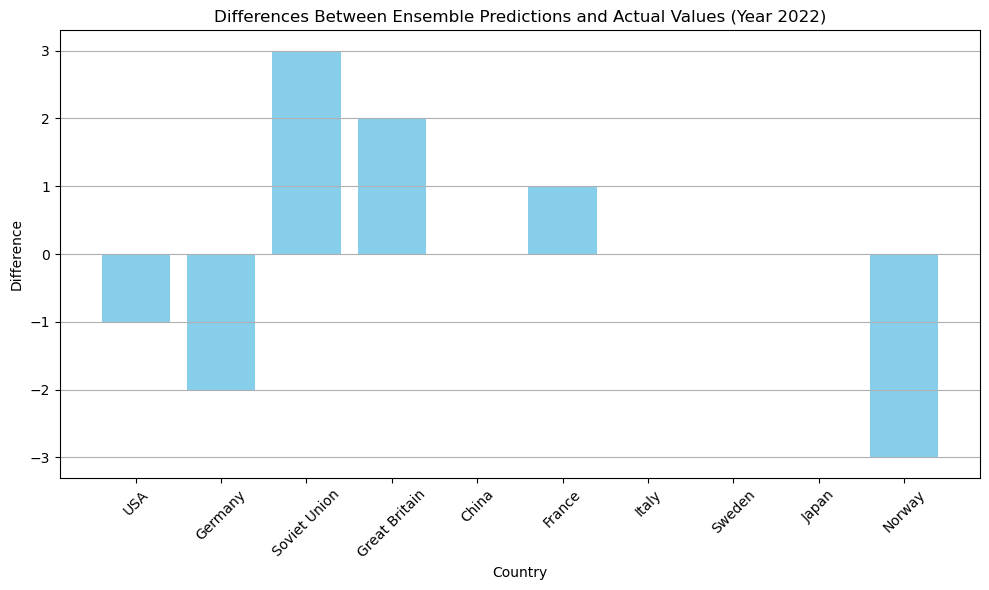

In [50]:
differences = [ensemble_pred[i] - y.iloc[i] for i in range(len(ensemble_pred))]

# Get the countries
countries = y.index

# Plot the differences
plt.figure(figsize = (10, 6))
plt.bar(countries, differences, color = 'skyblue')
plt.title('Differences Between Ensemble Predictions and Actual Values (Year 2022)')
plt.xlabel('Country')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [51]:
years_to_pred = [2024, 2026, 2028, 2030]
all_pred = []

for year in years_to_pred:
    year_pred = []
    
    for model_name, model in models:
        model.fit(X, y)
        
        pred = model.predict(X)
        pred_round = [round(pred) for pred in pred]
        
        year_pred.append(pred_round)
    
    ensemble_pred = [round(sum(preds) / len(preds)) for preds in zip(*year_pred)]
    
    all_pred.append(ensemble_pred)

for year, pred in zip(years_to_pred, all_pred):
    country_medal_counts_transposed[year] = pred

In [52]:
country_medal_counts_transposed

Year           1896  1900  1904  1908  1912  1920  1924  1928  1932  1936  \
USA              11    37   164    33    44    66    78    49    93    49   
Germany          10     2    12    12    20     0     0    25    17    77   
Soviet Union      0     0     0     0     0     0     0     0     0     0   
Great Britain     6    25     2    95    22    33    25    14    13     8   
China             0     0     0     0     0     0     0     0     0     0   
France           10    44     0    12    12    29    34    15    17    13   
Italy             0     5     0     3     4    16     9    11    26    13   
Sweden            0     1     0    19    45    44    20    23    23    22   
Japan             0     0     0     0     0     3     1     4    13    17   
Norway            0     4     1     5     2    12    23    16     9    17   

Year           ...  2012  2014  2016  2018  2020  2022  2024  2026  2028  2030  
USA            ...    90    28   103    21    95    24    23    23    23    23  
Germany        ...    39    16    33    28    39    27    25    25    25    25  
Soviet Union   ...     0     0     0     0     0     0     3     3     3     3  
Great Britain  ...    66     2    62     5    56     0     3     3     3     2  
China          ...    94     8    69     9    95    13    13    13    13    13  
France         ...    31    14    36    13    23    12    13    13    13    13  
Italy          ...    22     6    26     8    34    17    17    17    17    17  
Sweden         ...     8    12    10    10     7    16    16    16    16    16  
Japan          ...    31     7    37    11    50    14    15    14    14    14  
Norway         ...     3    24     5    33     8    33    30    30    30    30  

[10 rows x 41 columns]

In [53]:
country_medal_counts_retransposed = country_medal_counts_transposed.transpose()
country_medal_counts_retransposed.tail()

USA  Germany  Soviet Union  Great Britain  China  France  Italy  Sweden  \
Year                                                                            
2022   24       27             0              0     13      12     17      16   
2024   23       25             3              3     13      13     17      16   
2026   23       25             3              3     13      13     17      16   
2028   23       25             3              3     13      13     17      16   
2030   23       25             3              2     13      13     17      16   

      Japan  Norway  
Year                 
2022     14      33  
2024     15      30  
2026     14      30  
2028     14      30  
2030     14      30

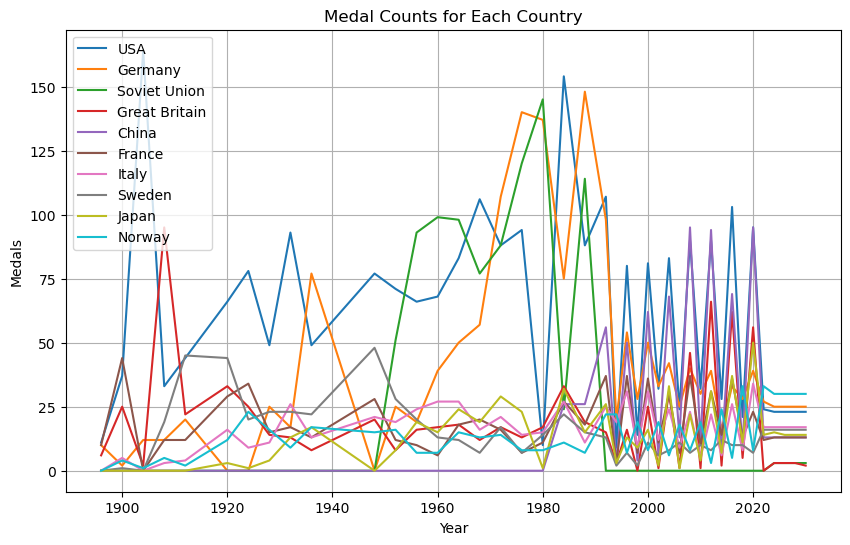

In [54]:
# Plot the predictions for each country
plt.figure(figsize = (10, 6))
for country in country_medal_counts_retransposed.columns:
    plt.plot(country_medal_counts_retransposed.index, country_medal_counts_retransposed[country], label = country)

plt.xlabel('Year')
plt.ylabel('Medals')
plt.title('Medal Counts for Each Country')
plt.legend()
plt.grid(True)
plt.show()

# Predictions with Time Series Models

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
medal_counts_dict = {}

for column in medal_counts_df.columns:
    medal_counts_column = medal_counts_df[['index', column]]
    medal_counts_column = medal_counts_column.squeeze()
    medal_counts_dict[column] = medal_counts_column

In [58]:
medal_counts_usa_all = medal_counts_dict['USA']
medal_counts_germany_all = medal_counts_dict['Germany']
medal_counts_sovietunion_all = medal_counts_dict['Soviet Union']
medal_counts_greatbritain_all = medal_counts_dict['Great Britain']
medal_counts_china_all = medal_counts_dict['China']
medal_counts_france_all = medal_counts_dict['France']
medal_counts_italy_all = medal_counts_dict['Italy']
medal_counts_sweden_all = medal_counts_dict['Sweden']
medal_counts_japan_all = medal_counts_dict['Japan']
medal_counts_norway_all = medal_counts_dict['Norway']

medal_counts_usa_all.set_index('index', inplace = True)
medal_counts_germany_all.set_index('index', inplace = True)
medal_counts_sovietunion_all.set_index('index', inplace = True)
medal_counts_greatbritain_all.set_index('index', inplace = True)
medal_counts_china_all.set_index('index', inplace = True)
medal_counts_france_all.set_index('index', inplace = True)
medal_counts_italy_all.set_index('index', inplace = True)
medal_counts_sweden_all.set_index('index', inplace = True)
medal_counts_japan_all.set_index('index', inplace = True)
medal_counts_norway_all.set_index('index', inplace = True)

medal_counts_usa_all = medal_counts_usa_all.squeeze()
medal_counts_germany_all = medal_counts_germany_all.squeeze()
medal_counts_sovietunion_all = medal_counts_sovietunion_all.squeeze()
medal_counts_greatbritain_all = medal_counts_greatbritain_all.squeeze()
medal_counts_china_all = medal_counts_china_all.squeeze()
medal_counts_france_all = medal_counts_france_all.squeeze()
medal_counts_italy_all = medal_counts_italy_all.squeeze()
medal_counts_sweden_all = medal_counts_sweden_all.squeeze()
medal_counts_japan_all = medal_counts_japan_all.squeeze()
medal_counts_norway_all = medal_counts_norway_all.squeeze()

Creating two different Time Series Models for predictions.

In [59]:
def fit_model(df, seasonal = False):
    if seasonal:
        model = pm.auto_arima(df, 
                            start_p = 1, 
                            start_q = 1,
                            test = 'adf',
                            max_p = 3, max_q = 3, 
                            m = 4, 
                            start_P = 0, 
                            seasonal = True, 
                            d = None, 
                            D = 1, 
                            trace = False,
                            error_action = 'ignore',  
                            suppress_warnings = True, 
                            stepwise = True)
    else:
        model = pm.auto_arima(df, 
                            start_p = 1, 
                            start_q = 1,
                            test = 'adf', 
                            max_p = 3, max_q = 3, 
                            m = 1, 
                            d = None,
                            seasonal = False,
                            trace = False, 
                            error_action = 'warn', 
                            suppress_warnings = True,
                            stepwise = True)
    
    return model

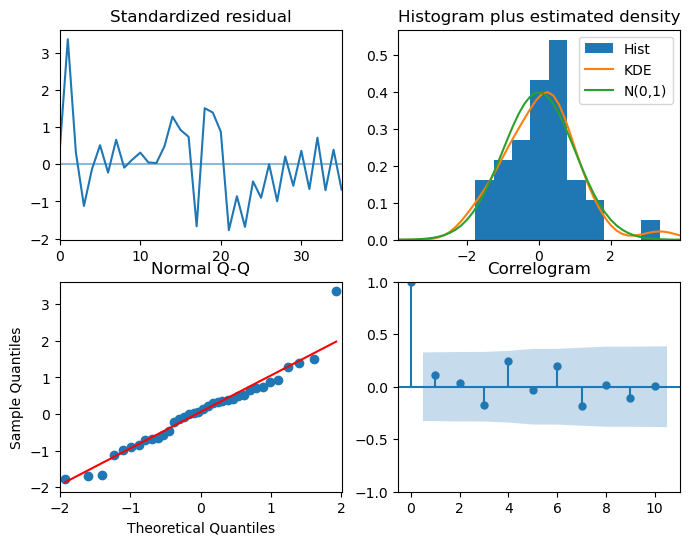

In [60]:
fit_model(medal_counts_usa_all).plot_diagnostics(figsize = (8, 6))
plt.show()

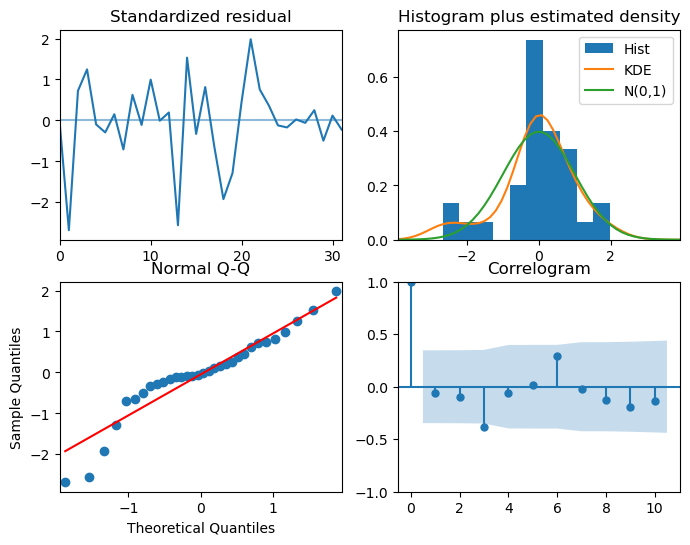

In [61]:
fit_model(medal_counts_usa_all, seasonal = True).plot_diagnostics(figsize = (8, 6))
plt.show()

In [62]:
fitted_series_dict = {}

def forecast(model, df, periods, country_name):
    global fitted_series_dict
    
    df.index = pd.to_datetime(df.index, format = '%Y')
    
    n_periods = periods
    fitted, confint = model.predict(n_periods = n_periods, return_conf_int = True)
    
    last_index = df.index[-1]

    index_of_fc = pd.date_range(last_index, periods = n_periods + 1, freq = '2YS')[1:]
    
    fitted_series = pd.Series(fitted.values, index = index_of_fc)
    fitted_series_dict[country_name] = fitted_series
    
    lower_series = pd.Series(confint[:, 0], index = index_of_fc)
    upper_series = pd.Series(confint[:, 1], index = index_of_fc)
    
    observed_values = df[-len(fitted_series):] 
    rmse = np.sqrt(np.mean((fitted - observed_values.values) ** 2))
    print('RMSE:', rmse)

    plt.figure(figsize = (15, 7))
    plt.plot(df.index, df.values, color = '#1f76b4', label = 'Original')
    plt.plot(fitted_series.index, fitted_series.values, color = 'darkgreen', label = 'Forecast')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color = 'k', alpha = .15)

    plt.title('Forecast')
    plt.xlabel('Year')
    plt.ylabel('Medals')
    plt.legend()
    plt.show()

RMSE: 30.568740080391944


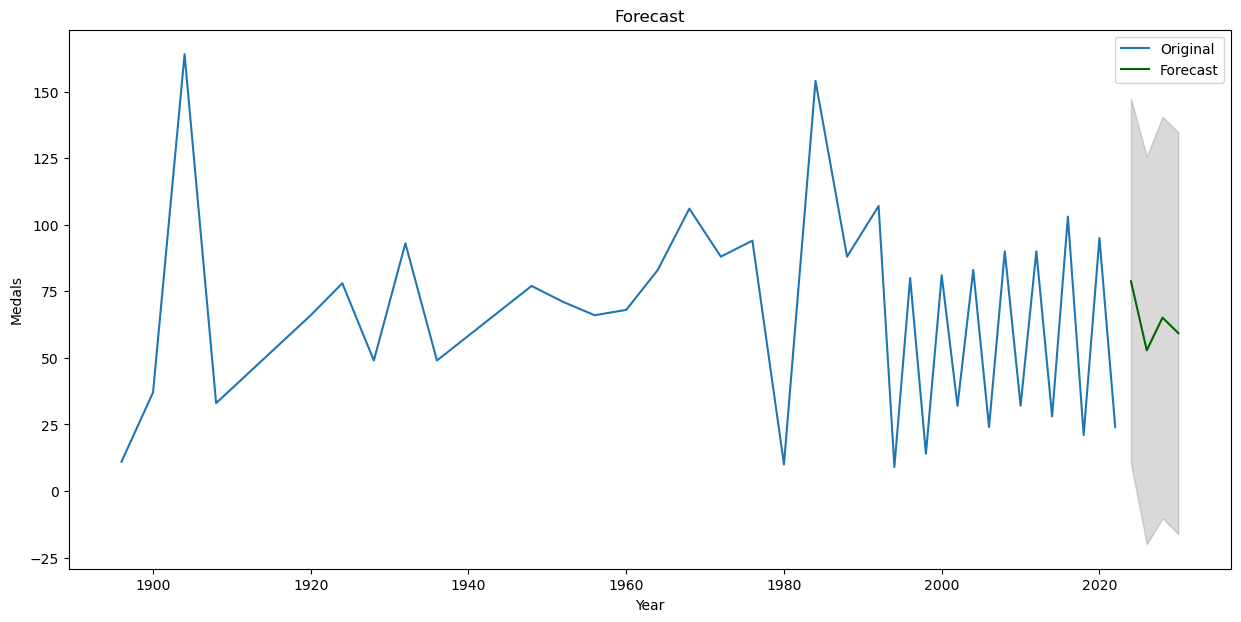

RMSE: 3.317570027134506


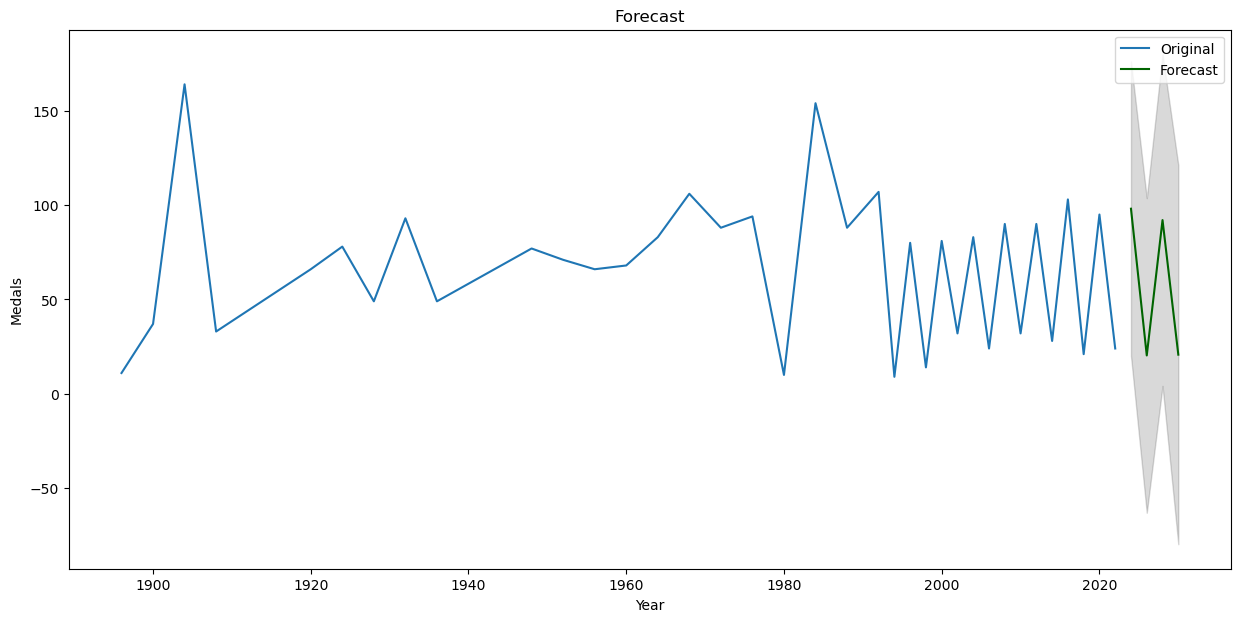

In [63]:
forecast(fit_model(medal_counts_usa_all), medal_counts_usa_all, 4, 'USA')
forecast(fit_model(medal_counts_usa_all, seasonal = True), medal_counts_usa_all, 4, 'USA')

RMSE: 5.389008773087072


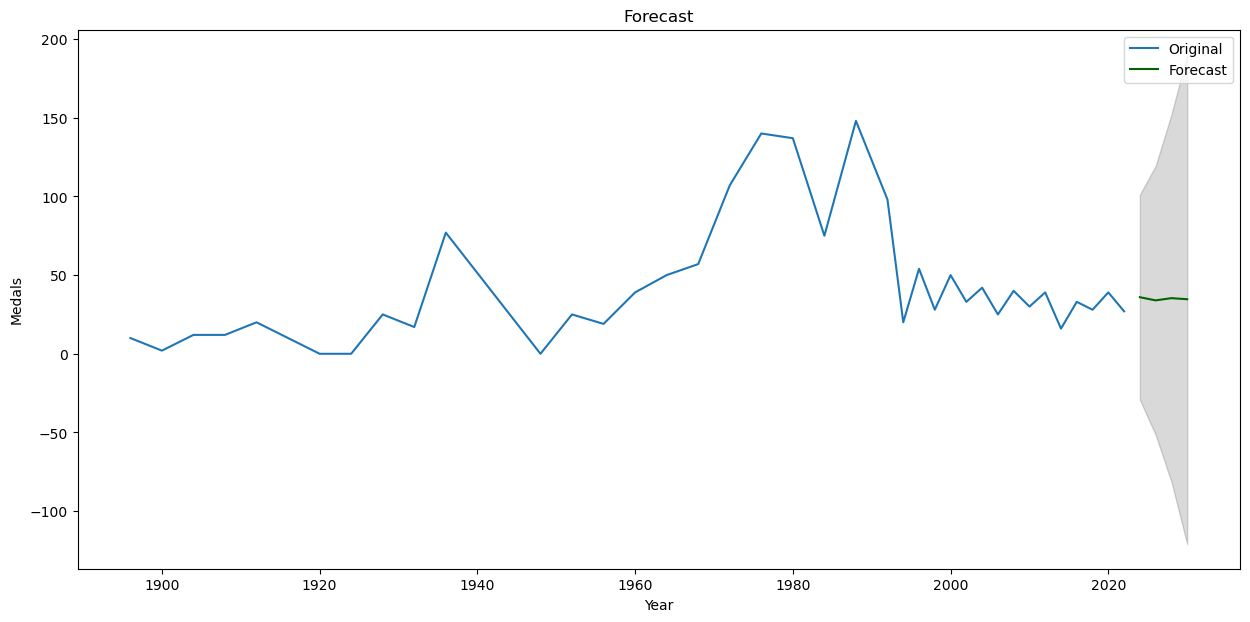

RMSE: 4.45049755562481


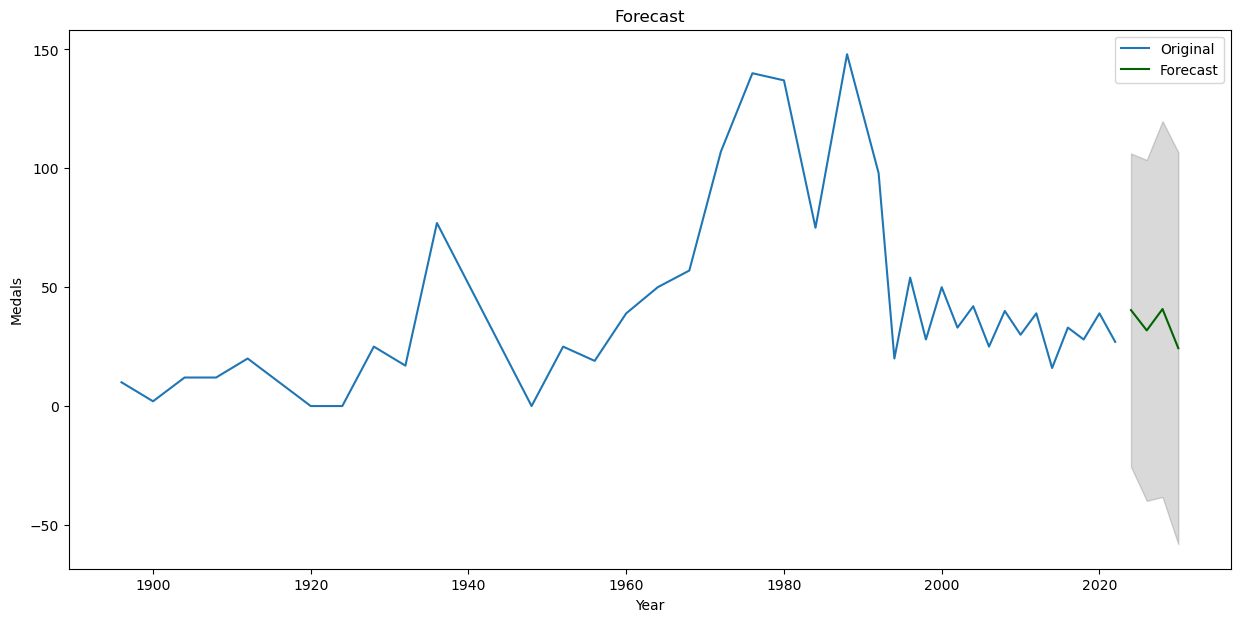

In [64]:
forecast(fit_model(medal_counts_germany_all), medal_counts_germany_all, 4, 'Germany')
forecast(fit_model(medal_counts_germany_all, seasonal = True), medal_counts_germany_all, 4, 'Germany')

RMSE: 4.321383228207329e-64


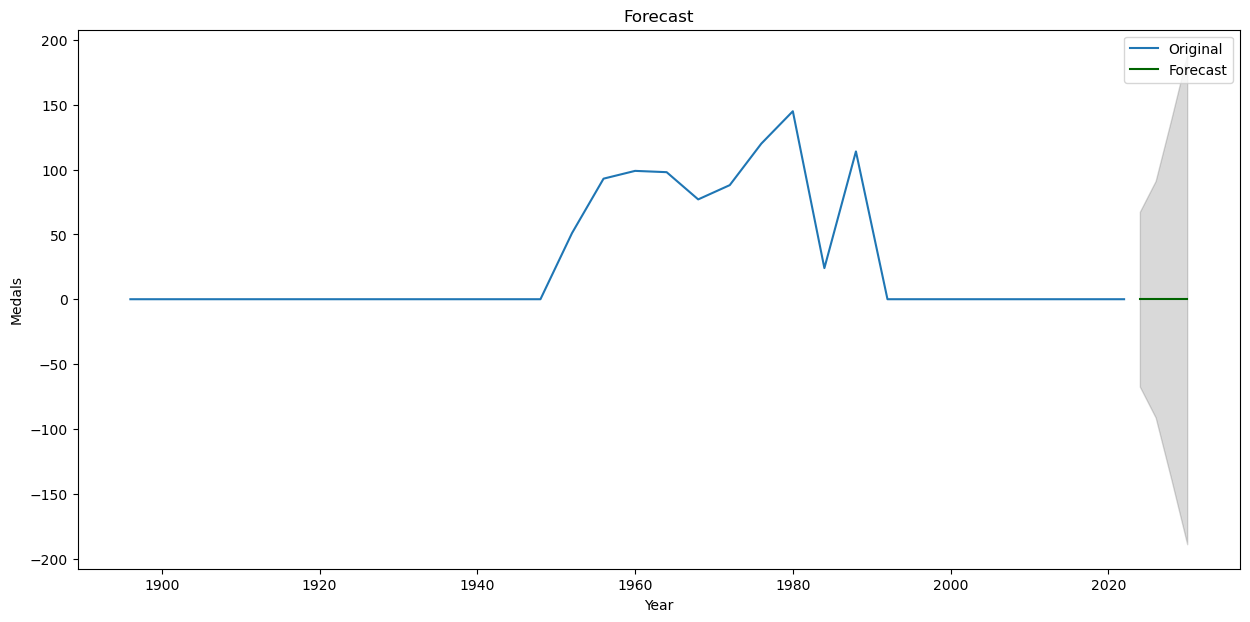

RMSE: 3.6663383559601828


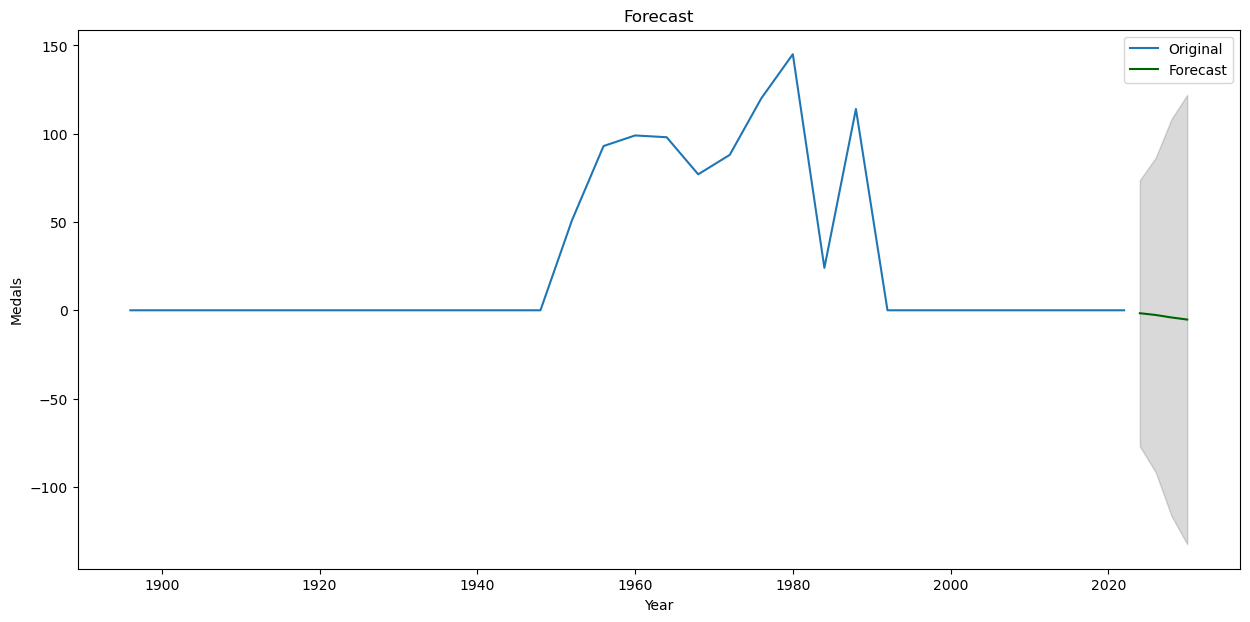

In [65]:
forecast(fit_model(medal_counts_sovietunion_all), medal_counts_sovietunion_all, 4, 'Soviet Union')
forecast(fit_model(medal_counts_sovietunion_all, seasonal = True), medal_counts_sovietunion_all, 4, 'Soviet Union')

RMSE: 10.65034595611939


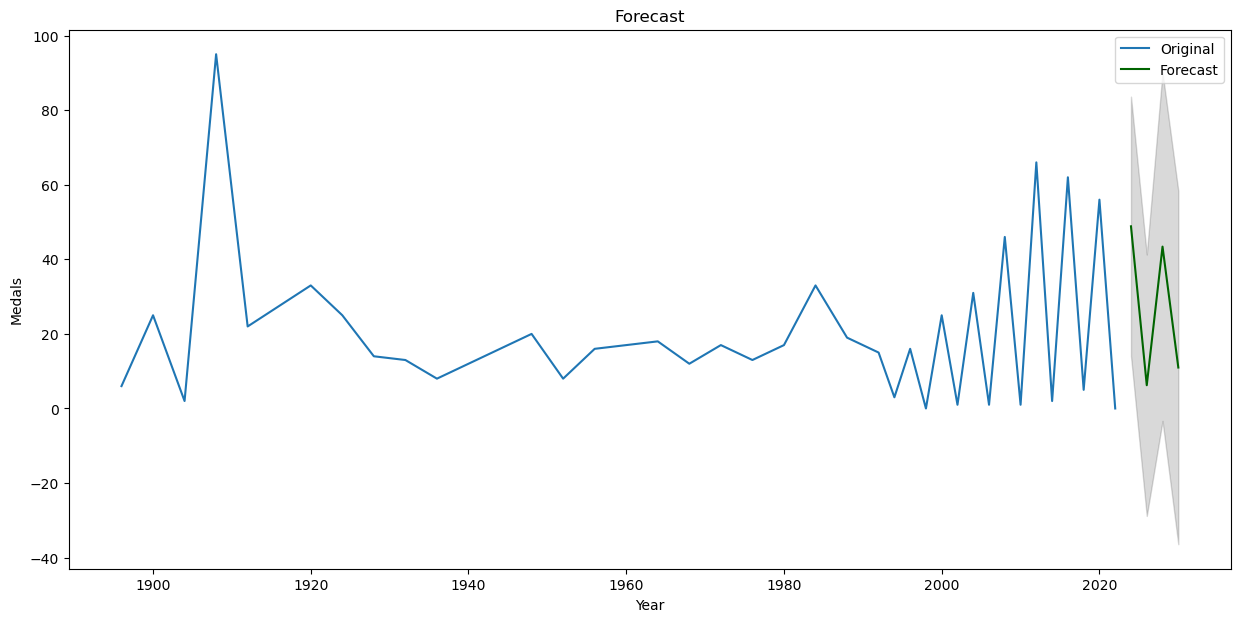

RMSE: 2.1385741272140972


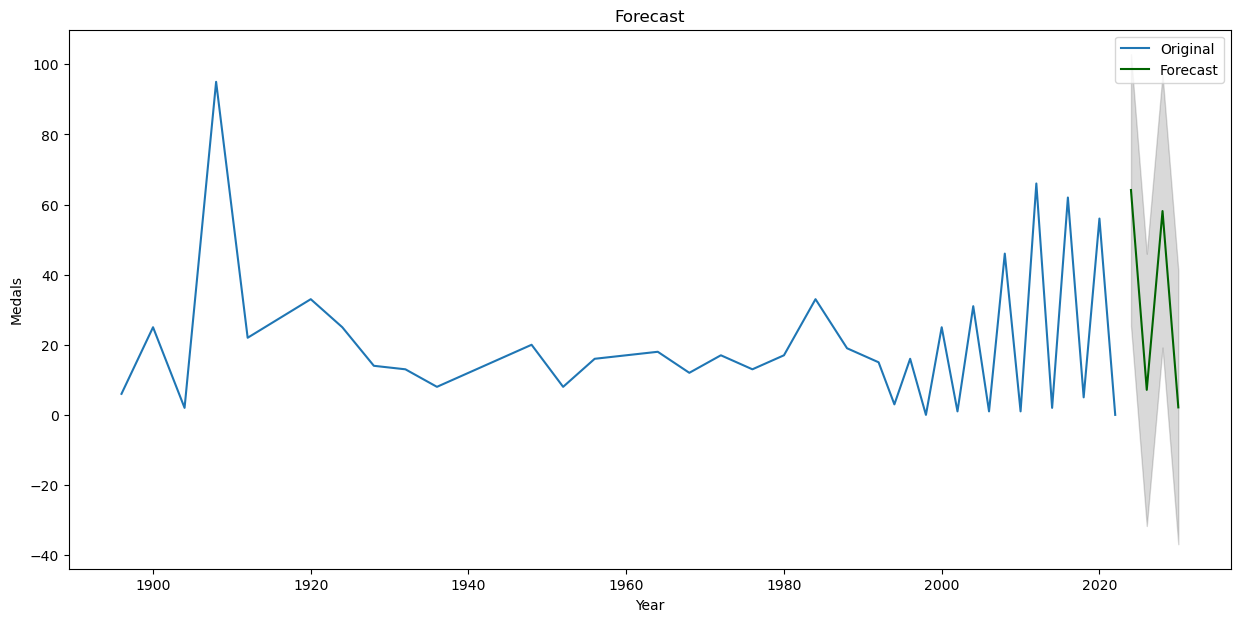

In [66]:
forecast(fit_model(medal_counts_greatbritain_all), medal_counts_greatbritain_all, 4, 'Great Britain')
forecast(fit_model(medal_counts_greatbritain_all, seasonal = True), medal_counts_greatbritain_all, 4, 'Great Britain')

RMSE: 15.13186795504426


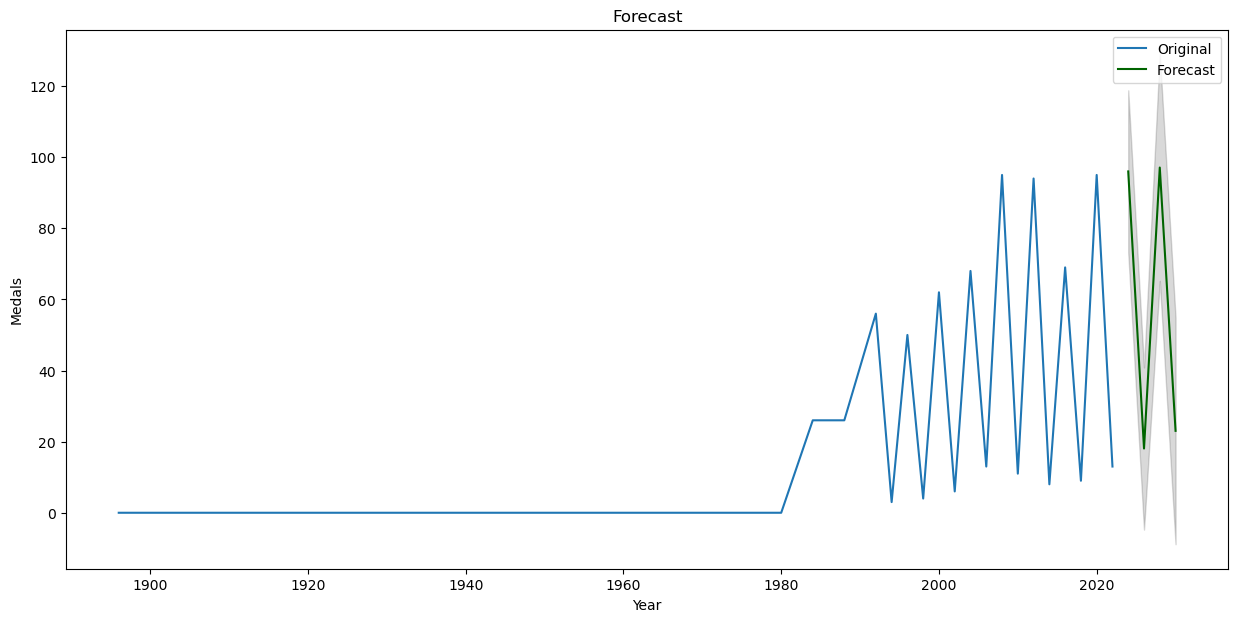

RMSE: 15.636057295330797


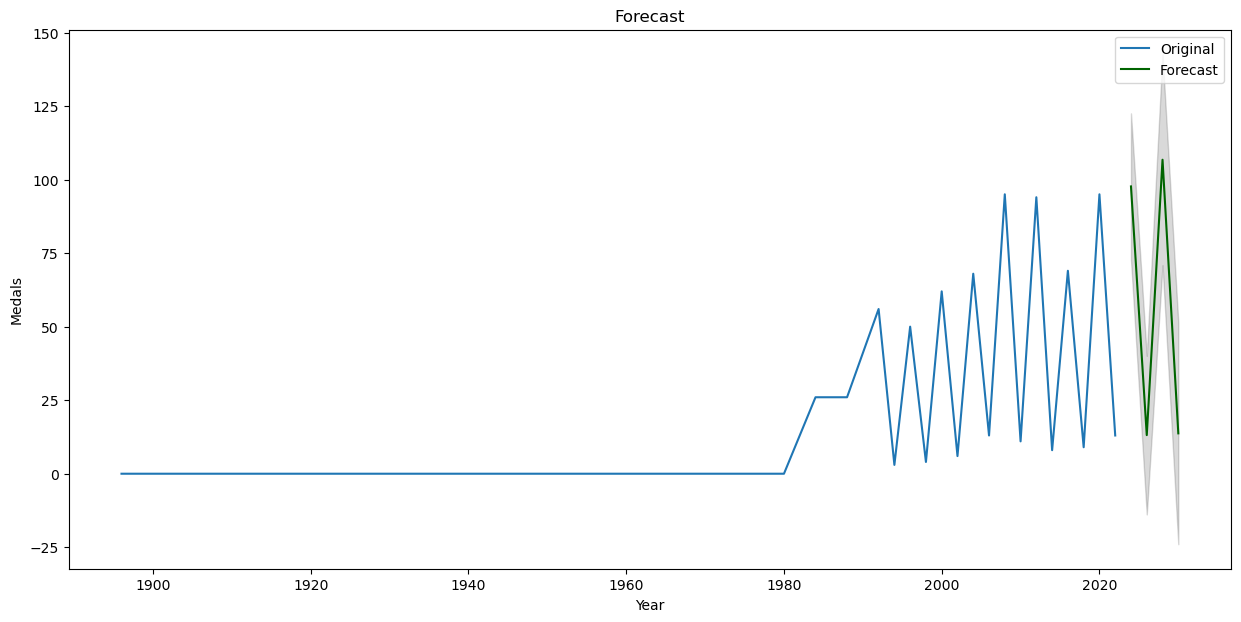

In [67]:
forecast(fit_model(medal_counts_china_all), medal_counts_china_all, 4, 'China')
forecast(fit_model(medal_counts_china_all, seasonal = True), medal_counts_china_all, 4, 'China')

RMSE: 7.5932452291209325


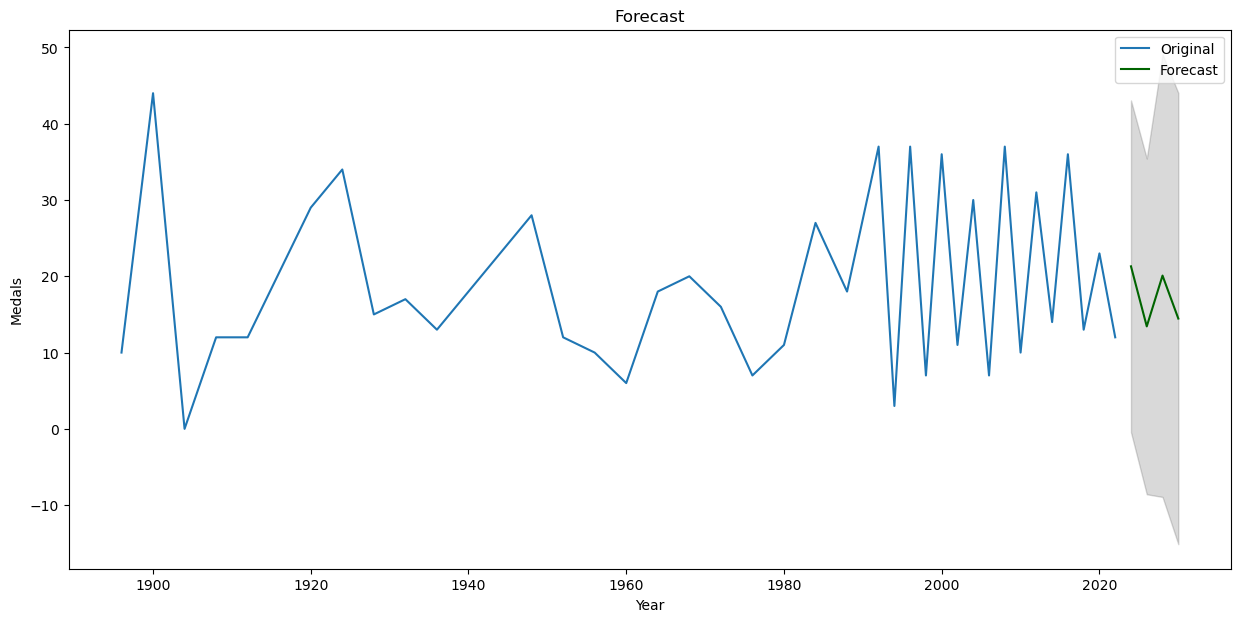

RMSE: 4.701268413058968


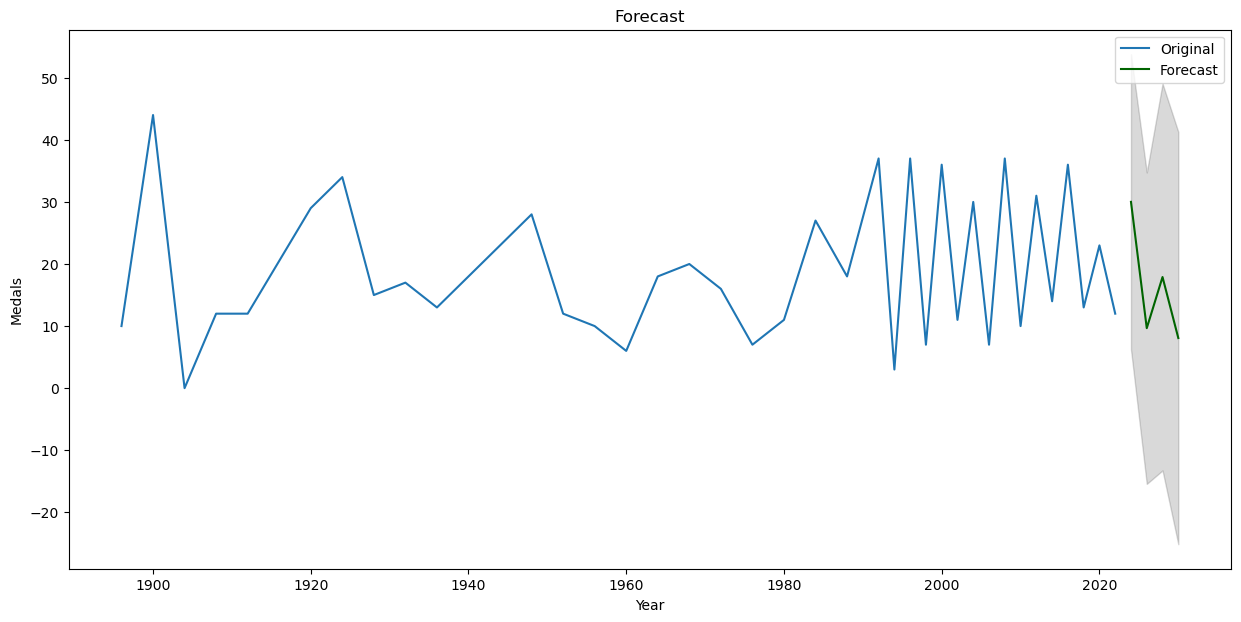

In [68]:
forecast(fit_model(medal_counts_france_all), medal_counts_france_all, 4, 'France')
forecast(fit_model(medal_counts_france_all, seasonal = True), medal_counts_france_all, 4, 'France')

RMSE: 13.476799550314771


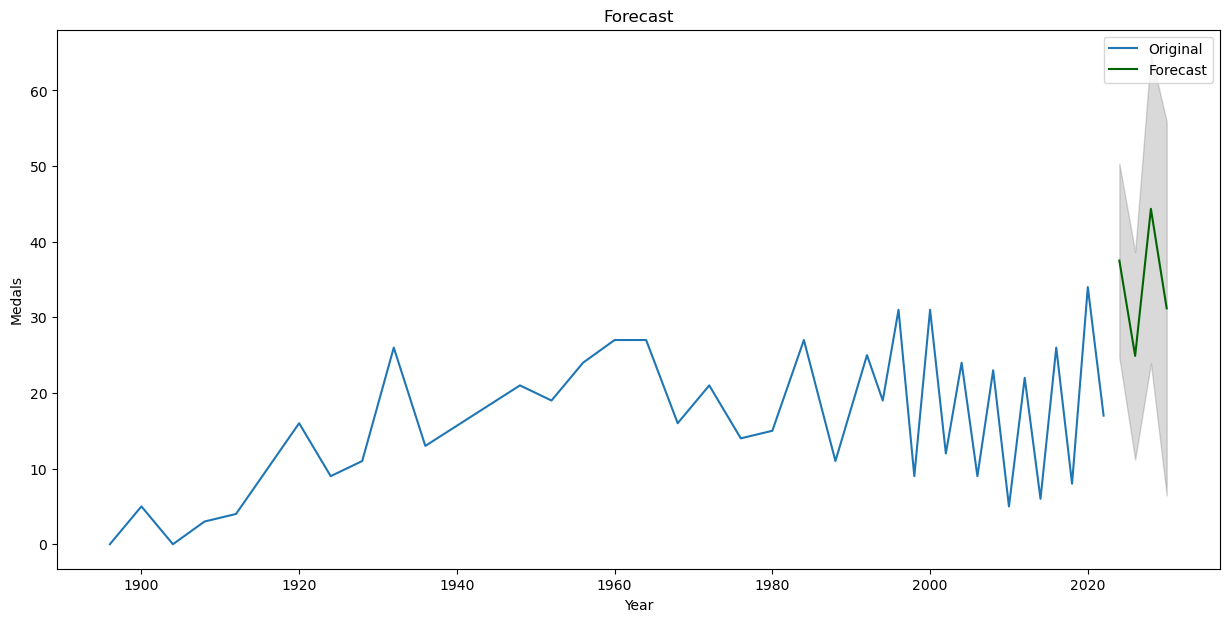

RMSE: 8.794854925813159


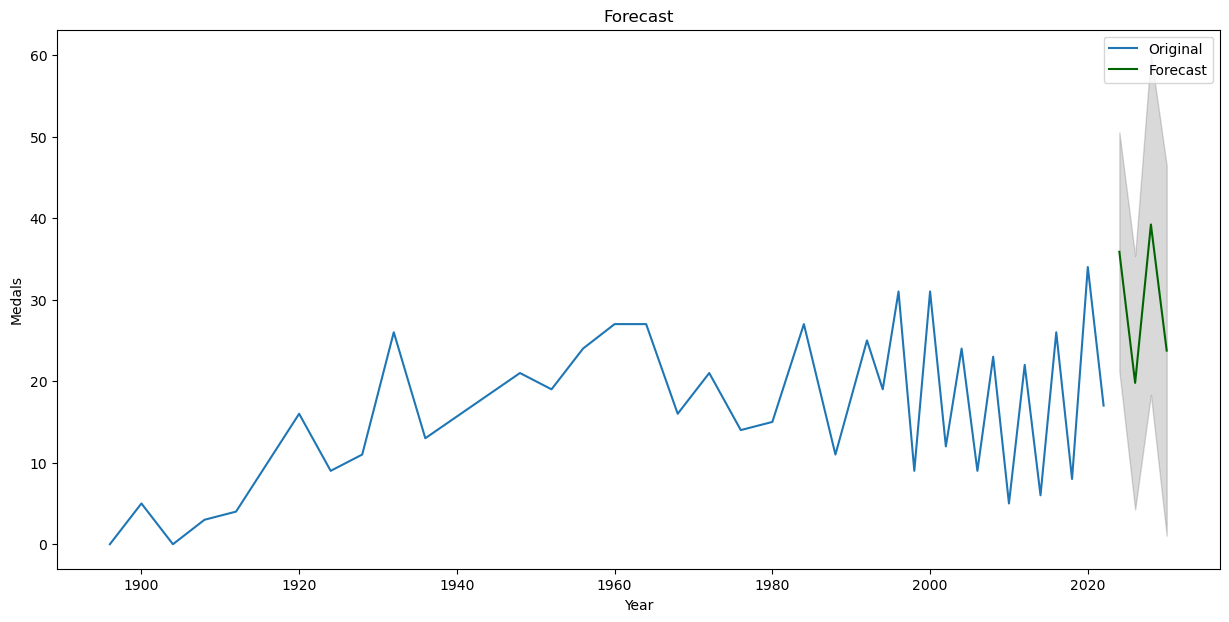

In [69]:
forecast(fit_model(medal_counts_italy_all), medal_counts_italy_all, 4, 'Italy')
forecast(fit_model(medal_counts_italy_all, seasonal = True), medal_counts_italy_all, 4, 'Italy')

RMSE: 5.245649919860164


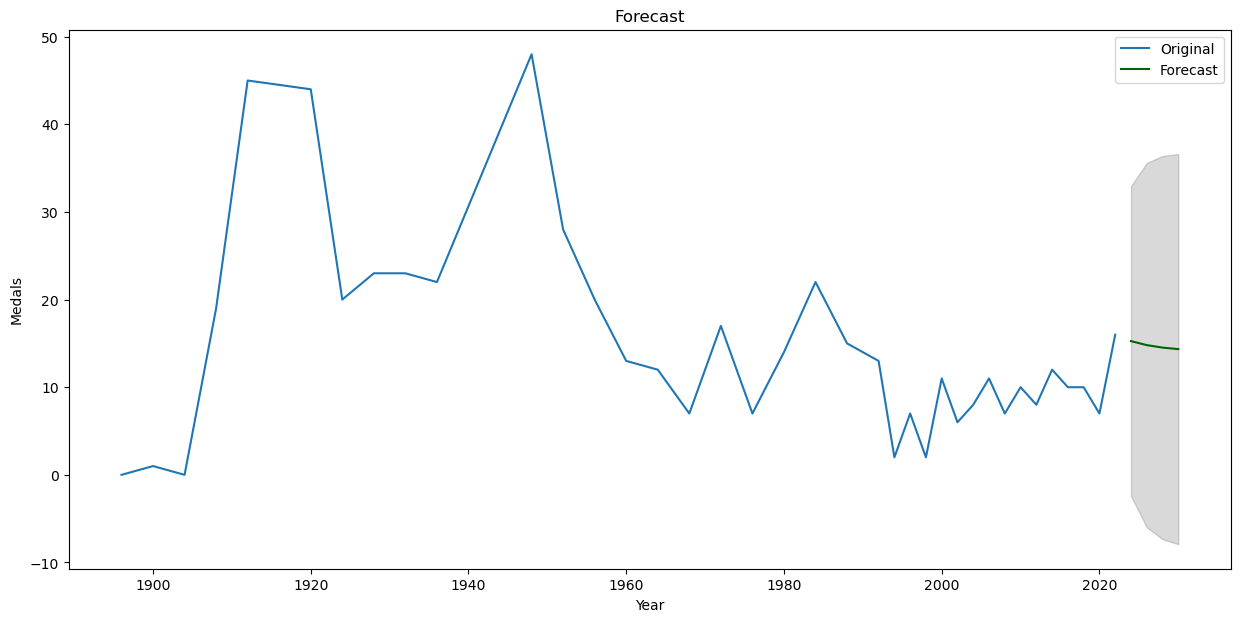

RMSE: 2.845194697926621


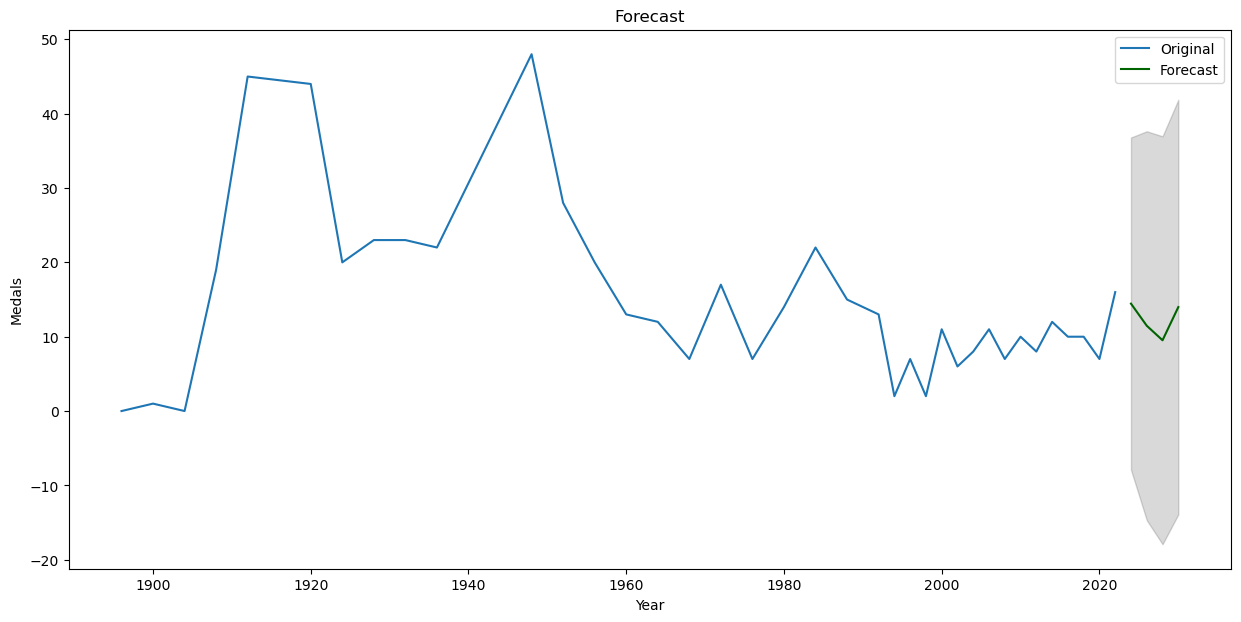

In [70]:
forecast(fit_model(medal_counts_sweden_all), medal_counts_sweden_all, 4, 'Sweden')
forecast(fit_model(medal_counts_sweden_all, seasonal = True), medal_counts_sweden_all, 4, 'Sweden')

RMSE: 11.753910881517541


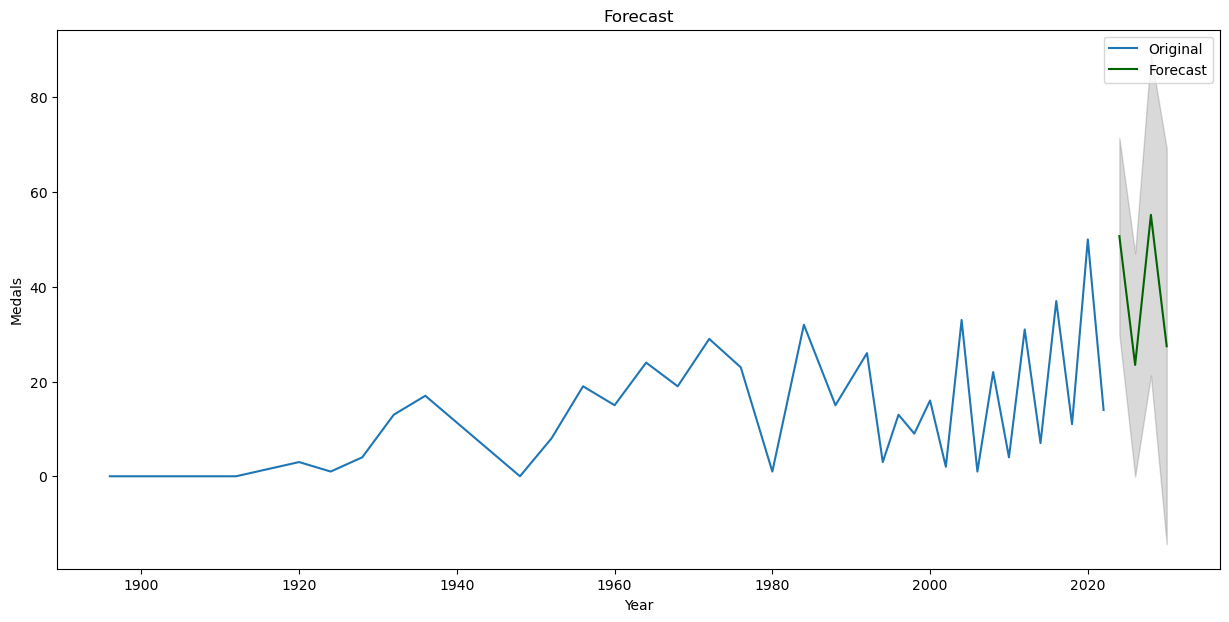

RMSE: 7.051822407903952


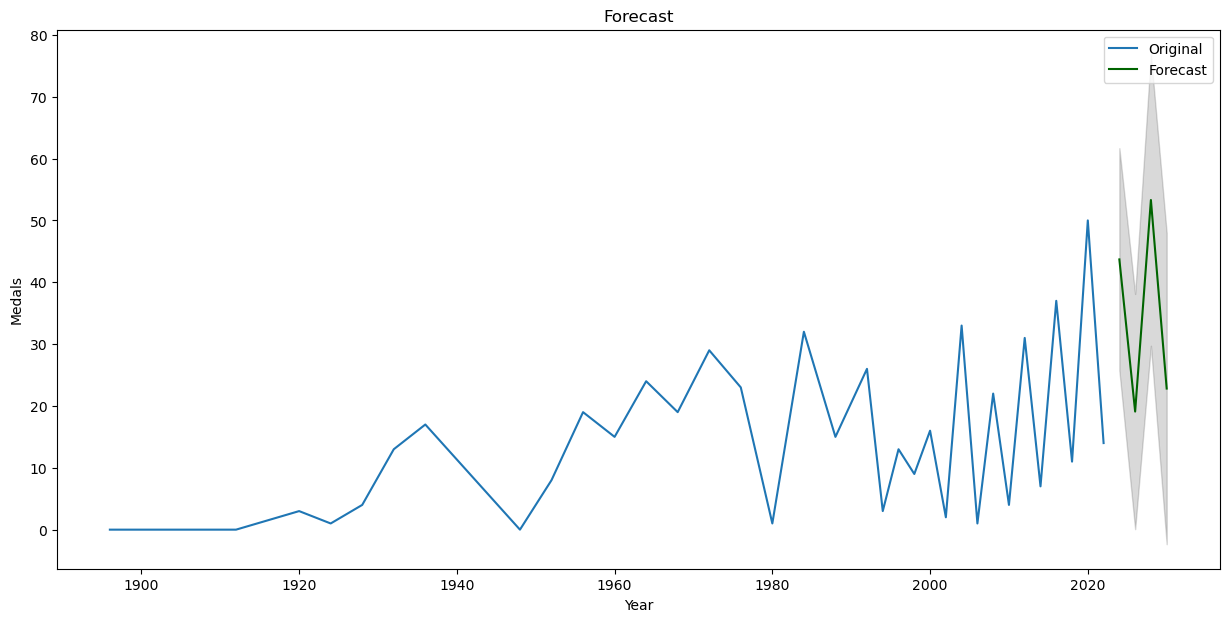

In [71]:
forecast(fit_model(medal_counts_japan_all), medal_counts_japan_all, 4, 'Japan')
forecast(fit_model(medal_counts_japan_all, seasonal = True), medal_counts_japan_all, 4, 'Japan')

RMSE: 5.902027554084992


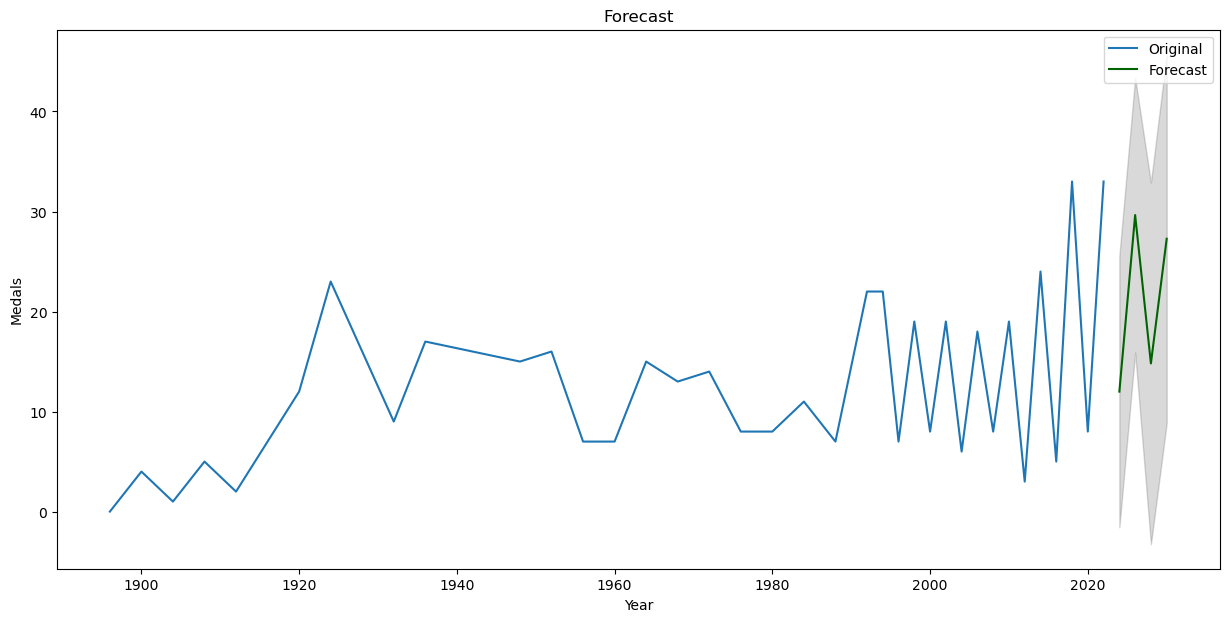

RMSE: 3.640113258788348


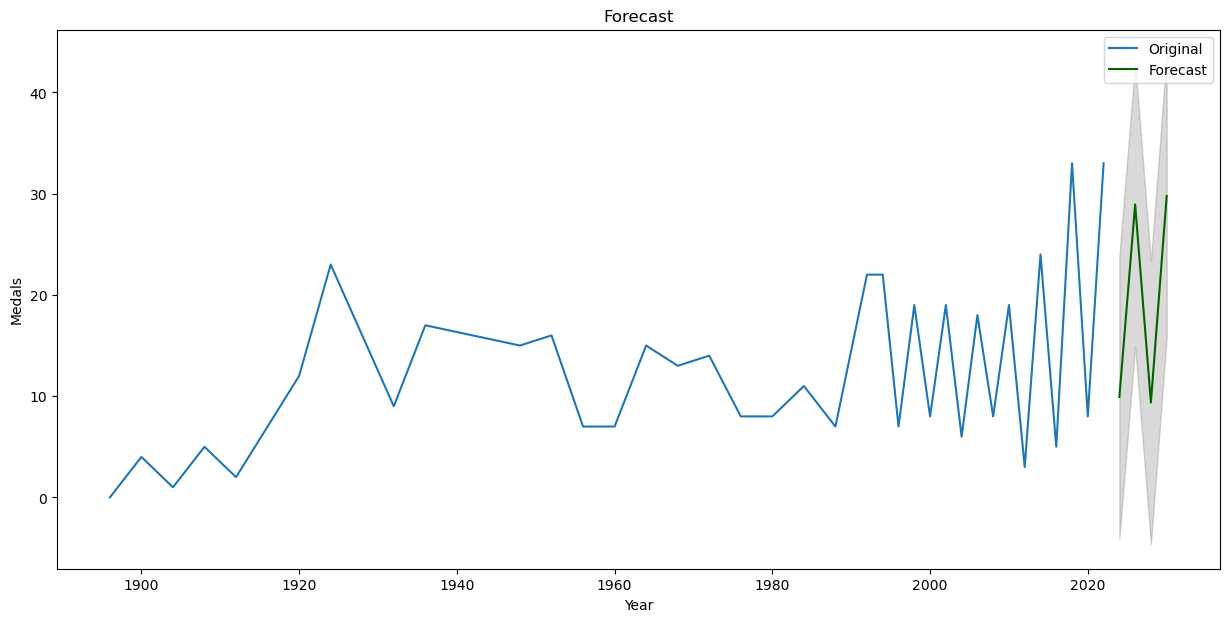

In [72]:
forecast(fit_model(medal_counts_norway_all), medal_counts_norway_all, 4, 'Norway')
forecast(fit_model(medal_counts_norway_all, seasonal = True), medal_counts_norway_all, 4, 'Norway')

In [73]:
highest_medals_per_year_all = {}

for country_name, fitted_series in fitted_series_dict.items():
    rounded_fitted_series = fitted_series.round().astype(int)
    highest_medals_per_year = rounded_fitted_series.groupby(rounded_fitted_series.index.year).max()
    for year, medals in highest_medals_per_year.items():
        if year not in highest_medals_per_year_all:
            highest_medals_per_year_all[year] = {'country': country_name, 'medals': medals}
        elif medals > highest_medals_per_year_all[year]['medals']:
            highest_medals_per_year_all[year] = {'country': country_name, 'medals': medals}

for year, data in highest_medals_per_year_all.items():
    print(f"In {year}, the country predicted to get the highest medals ({data['medals']}) is {data['country']}.")

In 2024, the country predicted to get the highest medals (98) is USA.
In 2026, the country predicted to get the highest medals (32) is Germany.
In 2028, the country predicted to get the highest medals (107) is China.
In 2030, the country predicted to get the highest medals (30) is Norway.
